# Model DBSCAN

This Jupyter notebook is used to:

1. Run PCA.
2. Run DBSCAN.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.40940          0.05894              0.02980   
1            1.00000           0.69959          0.05896              0.02978   
2            1.00000           0.76739          0.09980              0.00020   
3            1.00000           0.06320          0.10769              0.00002   
4            1.00000           0.85747          0.08774              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.75410                0.00139                   0.00030   
1            0.75419                0.00253                   0.00048   
2            0.75566                0.00365                   0.00047   
3            0.00183                0.00008                   0.00001   
4            0.75071                0.00000                   0.00000   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00016            0.00684                0.00012  ...   
1               0.00018            0.00684                0.00006  ...   
2               0.00008            0.00684                0.00001  ...   
3               0.00001            0.00186                0.00000  ...   
4               0.00000            0.00208                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0       77291                      44       tcp      ssl          SF   
1       36392                      29       tcp      ssl          SF   
2        3696                       9       tcp      ssl          SF   
3          76                       1       udp      ntp          SF   
4         180                       2       udp      dns         SHR   

        orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn         resp_443              No            No   
1  orig_reg_or_dyn         resp_443              No            No   
2  orig_reg_or_dyn         resp_443              No            No   
3  orig_well_known         resp_123              No            No   
4  orig_reg_or_dyn  resp_well_known              No            No   

                     timestamp  
0  2017-07-06T12:33:32.199062Z  
1  2017-07-06T12:33:32.258791Z  
2  2017-07-06T12:35:59.291704Z  
3  2017-07-06T12:36:27.694263Z  
4  2017-07-06T12:35:15.878393Z  

[5 rows x 296 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.85747          0.28205              0.00002   
1            1.00000           0.85747          0.69592              0.00004   
2            1.00000           0.85747          0.94669              0.00000   
3            1.00000           0.21935          0.66424              0.00010   
4            1.00000           0.85747          0.01940              0.00065   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.95662                0.00015                   0.00002   
1            0.12611                0.00012                   0.00002   
2            0.99023                0.00013                   0.00002   
3            0.91786                0.00088                   0.00015   
4            0.93446                0.00019                   0.00003   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00001            0.00078                0.00000  ...   
1               0.00001            0.00078                0.00000  ...   
2               0.00001            0.00078                0.00000  ...   
3               0.00006            0.00684                0.00001  ...   
4               0.00001            0.00078                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0         406                       2       udp      dns          SF   
1         170                       2       udp      dns          SF   
2         310                       2       udp      dns          SF   
3        5103                       9       tcp      ssl          SF   
4         287                       2       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_53              No            No   
3  orig_reg_or_dyn    resp_443              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0  2017-07-06T12:46:55.350392Z  
1  2017-07-06T13:11:45.228755Z  
2  2017-07-06T13:26:47.963843Z  
3  2017-07-06T13:09:51.172001Z  
4  2017-07-06T12:31:09.852836Z  

[5 rows x 296 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 40741 rows and 296 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        40741.00000       40741.00000      40741.00000   
mean             0.99045           0.73108          0.42134   
std              0.04815           0.24494          0.28713   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.76739          0.16474   
50%              1.00000           0.85747          0.38633   
75%              1.00000           0.85747          0.66300   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          40741.00000        40741.00000            40741.00000   
mean               0.01181            0.72588                0.00099   
std                0.03380            0.28519                0.00699   
min                0.00000            0.00000                0.00000   
25%                0.00002            0.68577                0.00008   
50%                0.00005            0.81401                0.00013   
75%                0.00381            0.92492                0.00058   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               40741.00000           40741.00000        40741.00000   
mean                    0.00019               0.00008            0.00328   
std                     0.00502               0.00496            0.02679   
min                     0.00000               0.00000            0.00000   
25%                     0.00002               0.00001            0.00078   
50%                     0.00002               0.00001            0.00078   
75%                     0.00012               0.00005            0.00186   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            40741.00000               40741.00000           40741.00000   
mean                 0.00004                   0.00004               0.00008   
std                  0.00496                   0.00496               0.00496   
min                  0.00000                   0.00000               0.00000   
25%                  0.00000                   0.00000               0.00001   
50%                  0.00000                   0.00000               0.00001   
75%                  0.00000                   0.00000               0.00003   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 40741.00000 40741.00000 40741.00000 40741.00000  40741.00000   
mean      0.60330     0.00317     0.07651     0.18922      0.00611   
std       0.48922     0.05618     0.26581     0.39169      0.03523   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      40741.00000                     40741.00000   
mean           0.30836                         0.41997   
std            0.23907                         0.28412   
min            0.00000                         0.00000   
25%            0.11852                         0.16444   
50%            0.24849                         0.38512   
75%            0.43185                         0.65754   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         40741.00000   
mean                              0.24218   
std                               0.15417   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.28205              0.00002            0.95662   
1          0.69592              0.00004            0.12611   
2          0.94669              0.00000            0.99023   
3          0.66424              0.00010            0.91786   
4          0.01940              0.00065            0.93446   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00015               0.00001            0.00078   
1                0.00012               0.00001            0.00078   
2                0.00013               0.00001            0.00078   
3                0.00088               0.00006            0.00684   
4                0.00019               0.00001            0.00078   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00000               0.00001    1.00000    0.00000   
1                0.00000               0.00001    1.00000    0.00000   
2                0.00000               0.00001    1.00000    0.00000   
3                0.00001               0.00005    0.00000    0.00000   
4                0.00000               0.00001    1.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     0.00000    1.00000      0.02970                           1   
4     0.00000    0.00000      0.00000                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    0                   1   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    1                   0   
4                   0                    0                   1   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      0                     1   
4                           0                      0                     0   

   connection.proto_udp  connection.service_dce_rpc  connection.service_dns  \
0                     1                           0                       1   
1                     1                           0                       1   
2                     1                           0                       1   
3                     0                           0                       0   
4                     1                           0                       1   

   connection.service_ftp  connection.service_ftp-data  \
0                       0                            0   
1                       0                            0   
2   

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SH',
       'resp_resp_connection.conn_state_mode_SHR'],
      dtype='object', length=207)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 207 principal components: 1.0


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999967]
Variance Captured by First  10 Principal Components: [0.9259073]
Variance Captured by First   7 Principal Components: [0.90158982]
Variance Captured by First   5 Principal Components: [0.87160514]
Variance Captured by First   2 Principal Components: [0.75262729]
Variance Captured by the First Principal Component:  [0.63109073]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.37541193
Variance of connection.duration                       : 0.25567880
Variance of connection.orig_p                         : 0.06725763
Variance of connection.orig_bytes                     : 0.05427892
Variance of connection.orig_pkts                      : 0.04586969
Variance of connection.resp_p                         : 0.04122915
Variance of connection.resp_bytes                     : 0.03187903
Variance of connection.resp_pkts                      : 0.01714301
Variance of dns_count                                 : 0.01284166
Variance of ssh_count                                 : 0.00973542
Variance of http_count                                : 0.00809607
Variance of ssl_count                                 : 0.00648599
Variance of files_count                               : 0.00596210
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00543643
Variance of orig_p_cat_orig_well_known                : 0.0043

In [16]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_, columns=df.columns)

connection.time  connection.duration  connection.orig_p  \
0            0.00940              0.00770           -0.02130   
1           -0.00558             -0.00266            0.03222   
2            0.05073             -0.00518           -0.02168   
3           -0.34060              0.00241            0.01211   
4           -0.05261              0.00031           -0.10717   
..               ...                  ...                ...   
202          0.00000             -0.00000            0.00000   
203         -0.00000             -0.00000           -0.00000   
204         -0.00000              0.00000            0.00000   
205          0.00000             -0.00000           -0.00000   
206         -0.00000             -0.00000            0.00000   

     connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                  0.00052               0.00004            0.00128   
1                 -0.00026              -0.00002           -0.00085   
2                 -0.00014               0.00001           -0.00014   
3                  0.00007               0.00008           -0.00019   
4                  0.00054              -0.00005            0.00161   
..                     ...                   ...                ...   
202                0.00000               0.00000           -0.00000   
203               -0.00000              -0.00000           -0.00000   
204                0.00000               0.00000           -0.00000   
205               -0.00000               0.00000           -0.00000   
206               -0.00000               0.00000            0.00000   

     connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                  0.00002               0.00004   -0.22460    0.00079   
1                 -0.00001              -0.00002    0.09698   -0.00198   
2                  0.00002               0.00000   -0.06478    0.00552   
3                  0.00008               0.00008   -0.05085   -0.00171   
4                 -0.00006              -0.00006   -0.10354    0.00382   
..                     ...                   ...        ...        ...   
202               -0.00000              -0.00000    0.00000    0.00345   
203                0.00000               0.00000   -0.00000   -0.00126   
204                0.00000              -0.00000   -0.00000    0.00460   
205               -0.00000              -0.00000   -0.00000    0.00000   
206               -0.00000              -0.00000   -0.00000    0.32441   

     http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0       0.04504    0.13470      0.00359                    -0.01027   
1      -0.01658   -0.04620     -0.00230                    -0.00875   
2       0.12685   -0.29284      0.00314                    -0.03413   
3       0.10846   -0.07463      0.00204                     0.01742   
4      -0.13953    0.14428      0.00052                    -0.02440   
..          ...        ...          ...                         ...   
202    -0.00000   -0.00011     -0.00000                    -0.03115   
203     0.00000    0.00017      0.00000                     0.00311   
204     0.00000   -0.00022      0.00000                    -0.01443   
205    -0.00000    0.00000     -0.00000                    -0.00000   
206     0.00000    0.09281     -0.00000                     0.10119   

     orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                       0.01027              0.01046             0.00022   
1                       0.00875              0.00863            -0.00051   
2                       0.03413              0.03107             0.00151   
3                      -0.01742             -0.01290            -0.00029   
4                       0.02440              0.02539             0.00125   
..                          ...                  ...                 ...   
202                    -0.03115              0.00437             0.00176   
203                     0.00311  

In [17]:
# pca_X = pca_X.sample(10000)

In [18]:
pca_X = pca_X.iloc[:, :150]  # take first 150 principal components
pca_X

0        1        2        3        4        5        6        7    \
0     -2.09473 -1.14859 -0.32133  0.17496 -0.26057 -0.03627  0.05466  0.12321   
1     -1.82399 -1.07054 -0.05254 -0.78069 -0.29503  0.28100 -0.06236  0.03714   
2     -1.80567 -1.10121  0.00604 -1.30124 -0.54897  0.09709 -0.41073 -0.18821   
3      2.67308 -0.87973 -0.96417 -0.56996 -0.15492 -0.12284 -0.24479 -0.23402   
4     -0.21862  2.92116  0.04068  0.49326 -0.17083 -0.46032  0.47497  0.38958   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736  1.00444 -1.52808  0.94138 -0.50731  0.32525 -0.08141 -0.31687 -0.55680   
40737 -0.13534  2.64984  0.20319 -0.55101 -0.22612 -0.16005 -0.04335  0.03752   
40738 -2.11025 -1.15627 -0.33063  0.18626 -0.25635 -0.03523  0.04701  0.12538   
40739 -0.20797  2.90799  0.00878  0.51024 -0.21836 -0.46974  0.42366  0.21958   
40740  2.18520 -0.87323  0.72859  0.34018 -0.07055 -0.38840  1.00375  0.98108   

           8        9        10       11       12       13       14       15   \
0     -0.17350 -0.02060 -0.01521  0.11677  0.14124 -0.03872 -0.17527 -0.19531   
1     -0.08452 -0.02130 -0.04848  0.09290  0.03952  0.04056  0.65349  0.04500   
2     -0.16527 -0.07827 -0.25315  0.03489 -0.03733  0.12412 -0.21967  0.12820   
3     -0.14461 -0.23764 -0.11485 -0.06713  0.12658  0.07547 -0.31174  0.13667   
4     -0.41099 -0.10310  0.07490  0.17702  0.04829 -0.12553 -0.08418 -0.05208   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736 -0.83083 -0.43532  0.17300  0.16683 -0.14460  0.65203  0.04802 -0.66203   
40737 -0.03615  0.00747  0.01717  0.01669  0.04349 -0.26747 -0.08170 -0.10519   
40738 -0.15867 -0.01554 -0.01981  0.08615  0.13763 -0.02081 -0.19741 -0.20517   
40739 -0.26610 -0.08411  0.01727  0.17996  0.00695 -0.14512 -0.03734 -0.04189   
40740 -0.03797  1.78607 -0.44997  0.73567 -0.04894  0.33018 -0.86843 -0.27602   

           16       17       18       19       20       21       22       23   \
0     -0.00993  0.00475  0.15856  0.06417  0.05314  0.05390 -0.07761  0.02825   
1      0.16648 -0.06766 -0.00058  0.19694 -0.14698 -0.00420 -0.00661 -0.18743   
2      0.21176 -0.02570 -0.20205 -0.03513  0.03196  0.11464 -0.22598  0.11560   
3      0.02438  0.09581  0.05729 -0.15467  0.09585 -0.10903  0.04416  0.00796   
4     -0.08033 -0.16179 -0.11998  0.25550 -0.04749  0.09106  0.07942  0.47093   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736  0.42987  1.30170 -0.43988  1.25299  0.15100  0.07971 -0.05371 -0.19291   
40737 -0.25460 -0.13455 -0.03785  0.09246  0.03847 -0.06827  0.02152 -0.03104   
40738 -0.02422 -0.01314  0.12473  0.07112  0.05065  0.05569 -0.07568  0.04154   
40739 -0.00413 -0.05287 -0.10698  0.14811 -0.00914  0.04998 -0.01262  0.16467   
40740 -0.03333 -0.05112  0.15866  0.51409 -1.04746 -0.74462 -0.60911  0.01079   

           24       25       26       27       28       29       30       31   \
0     -0.04367 -0.10357 -0.09126 -0.07949  0.04138 -0.02622  0.05176  0.05529   
1     -0.19344  0.14282  0.23164  0.10163 -0.31986  0.03240  0.05853  0.01708   
2     -0.01448 -0.04421 -0.07410 -0.03939 -0.05246 -0.07699 -0.09124 -0.04018   
3      0.21012  0.13760  0.29996  0.10118 -0.17944  0.01578  0.00189  0.04299   
4     -0.07145  0.43901  0.11118 -0.23425  0.10502  0.00081 -0.02452  0.02386   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736  0.45156  0.03156  0.50364  0.54096  0.61229 -0.16923 -0.03884  0.22801   
40737 -0.02264 -0.19113  0.08459  0.11205 -0.05957  0.10211  0.01084  0.01786   
40738 -0.04171 -0.08686 -0.08910 -0.05289  0.00917 -0.03589  0.04627  0.02978   
40739 -0.02965  0.06370  0.04572  0.00917 -0.03866  0.01071 -0.02043  0.01319   
40740  0.49089 -0.18800  0.56806  0.98554  0.78489  0.00595  1.21908 -0.59838   

           32       33       34       35       36       37       38       39   \
0     -0.06712  0.23379 -0.06780  0.03

## 2. DBSCAN

(https://towardsdatascience.com/dbscan-with-python-743162371dca)

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan)

### Parameters of sklearn.cluster.DBSCAN: 

```
eps:
        Max distance between two samples (where one is in the neighborhood of the other), not max distances of points within a cluster.
        (default is 0.5)

min_samples:
        Num of samples in core points' neighborhood (including the point itself)
        (default is 5)

metric:
        Distance function. 
        (default is ’euclidean’, options available at sklearn.metrics.pairwise_distances)

metric_params
        Additional keyword arguments for the metric function.
        (default is None)

algorithm: 
        {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
        Alg. used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
        (default is ’auto’)
    
leaf_size:
        Leaf size passed to BallTree or cKDTree, can affect the speed of the construction and query, as well as the memory required to store the tree, optimal value depends on the nature of the problem.
        (default is 30)
 
p: 
        Power of the Minkowski metric (used when calculating distance between points).
        (default is None, if None p == 2, which is equivalent to Euclidean distance)
    
n_jobsint:
        Num of parallel jobs to run. 
        (default is None, None == 1, -1 == use all processors)
        
```

### Attributes: 

```
core_sample_indices_:
        Indices of core samples.
        
components_:
        Copy of each core sample found by training.

labels_:
        Cluster labels for each point in the dataset given to fit(), noisy samples have label -1.
        
n_features_in_:
        Num of features seen during fit.

feature_names_in_:
        Names of features seen during fit. Defined only when X has feature names that are all strings.
```

In [19]:
from datetime import datetime
# https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/
from sklearn.cluster import DBSCAN

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
db = DBSCAN(eps=2.0, min_samples=250, n_jobs=-1)
db_fitted = db.fit(pca_X)
y_db = db.fit_predict(pca_X)
print_str = 'DBSCAN finished ({})'.format(datetime.now().strftime("%H:%M:%S"))
print(print_str)

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:20:00.
DBSCAN finished (00:21:00)
Done at 00:21:00.


In [20]:
print_str

'DBSCAN finished (00:21:00)'

In [21]:
# Indices of core samples
db_fitted.core_sample_indices_

array([    0,     1,     2, ..., 40737, 40738, 40739])

In [22]:
# Copy of each core sample found by training
db_fitted.components_

array([[-2.09472818e+00, -1.14859477e+00, -3.21333222e-01, ...,
         3.27482356e-04,  7.76716650e-04,  2.21780597e-05],
       [-1.82398934e+00, -1.07054325e+00, -5.25411242e-02, ...,
         4.82761153e-04, -6.94109754e-05, -2.12728816e-05],
       [-1.80566656e+00, -1.10121142e+00,  6.04210087e-03, ...,
        -2.19695991e-03, -4.27988680e-05, -5.34652787e-05],
       ...,
       [-1.35343547e-01,  2.64984008e+00,  2.03185416e-01, ...,
        -1.80498564e-03, -4.28955412e-04,  3.69026347e-06],
       [-2.11024910e+00, -1.15627336e+00, -3.30625806e-01, ...,
         5.44898050e-04,  7.63943450e-04,  8.54362065e-05],
       [-2.07971078e-01,  2.90798785e+00,  8.77885910e-03, ...,
        -6.87479864e-04,  1.55323237e-04,  3.38503407e-05]])

In [23]:
# Number of features seen during fit
db_fitted.n_features_in_

150

In [24]:
# Noisy samples have label -1
db_fitted.labels_

array([ 0,  0,  0, ...,  0,  2, -1])

In [25]:
y_db

array([ 0,  0,  0, ...,  0,  2, -1])

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = y_db
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0 -2.09473 -1.14859 -0.32133  0.17496 -0.26057 -0.03627  0.05466  0.12321   
1 -1.82399 -1.07054 -0.05254 -0.78069 -0.29503  0.28100 -0.06236  0.03714   
2 -1.80567 -1.10121  0.00604 -1.30124 -0.54897  0.09709 -0.41073 -0.18821   
3  2.67308 -0.87973 -0.96417 -0.56996 -0.15492 -0.12284 -0.24479 -0.23402   
4 -0.21862  2.92116  0.04068  0.49326 -0.17083 -0.46032  0.47497  0.38958   

         8        9       10       11       12       13       14       15  \
0 -0.17350 -0.02060 -0.01521  0.11677  0.14124 -0.03872 -0.17527 -0.19531   
1 -0.08452 -0.02130 -0.04848  0.09290  0.03952  0.04056  0.65349  0.04500   
2 -0.16527 -0.07827 -0.25315  0.03489 -0.03733  0.12412 -0.21967  0.12820   
3 -0.14461 -0.23764 -0.11485 -0.06713  0.12658  0.07547 -0.31174  0.13667   
4 -0.41099 -0.10310  0.07490  0.17702  0.04829 -0.12553 -0.08418 -0.05208   

        16       17       18       19       20       21       22       23  \
0 -0.00993  0.00475  0.15856  0.06417  0.05314  0.05390 -0.07761  0.02825   
1  0.16648 -0.06766 -0.00058  0.19694 -0.14698 -0.00420 -0.00661 -0.18743   
2  0.21176 -0.02570 -0.20205 -0.03513  0.03196  0.11464 -0.22598  0.11560   
3  0.02438  0.09581  0.05729 -0.15467  0.09585 -0.10903  0.04416  0.00796   
4 -0.08033 -0.16179 -0.11998  0.25550 -0.04749  0.09106  0.07942  0.47093   

        24       25       26       27       28       29       30       31  \
0 -0.04367 -0.10357 -0.09126 -0.07949  0.04138 -0.02622  0.05176  0.05529   
1 -0.19344  0.14282  0.23164  0.10163 -0.31986  0.03240  0.05853  0.01708   
2 -0.01448 -0.04421 -0.07410 -0.03939 -0.05246 -0.07699 -0.09124 -0.04018   
3  0.21012  0.13760  0.29996  0.10118 -0.17944  0.01578  0.00189  0.04299   
4 -0.07145  0.43901  0.11118 -0.23425  0.10502  0.00081 -0.02452  0.02386   

        32       33       34       35       36       37       38       39  \
0 -0.06712  0.23379 -0.06780  0.03884 -0.10742 -0.04283  0.02120  0.05259   
1 -0.09441 -0.16134 -0.02881  0.11938  0.05677 -0.13830 -0.05035  0.07698   
2 -0.06994 -0.06906  0.02788 -0.13782  0.09040 -0.04490 -0.05433 -0.06359   
3 -0.06447  0.09991 -0.09122 -0.06605 -0.04112 -0.06368  0.00612  0.04343   
4 -0.08522 -0.07845 -0.01575 -0.05127  0.02359 -0.03129  0.00373  0.01181   

        40       41       42       43       44       45       46       47  \
0  0.00978 -0.04728 -0.05249  0.06569 -0.00069  0.01025  0.01300 -0.02381   
1  0.08322  0.03257 -0.02007  0.02175  0.03253 -0.02863  0.09337 -0.00511   
2 -0.00244  0.05652  0.04979 -0.03768  0.06339 -0.00025  0.09769 -0.01260   
3  0.02127  0.01128  0.00204 -0.00673  0.06870  0.05298 -0.01338  0.01049   
4 -0.09787 -0.00631 -0.00998  0.01747  0.02524 -0.00309  0.03360 -0.00253   

        48       49      50       51       52       53       54       55  \
0 -0.07265 -0.08498 0.04251  0.03724  0.04585 -0.02499  0.08886  0.04854   
1 -0.02384 -0.03138 0.03807 -0.00013 -0.02398 -0.02517  0.01428 -0.00083   
2 -0.05151 -0.02979 0.01340  0.02920 -0.01205 -0.03446 -0.01283 -0.01199   
3 -0.07797  0.22546 0.08267  0.05338  0.12920 -0.07682  0.09308 -0.14321   
4  0.00881 -0.01927 0.03702 -0.02816  0.03454  0.05030 -0.00252 -0.01211   

        56       57       58       59       60       61       62       63  \
0 -0.00881 -0.00725 -0.04120  0.07697  0.00741  0.02513 -0.00690 -0.01812   
1  0.00228 -0.01385 -0.02261  0.00582  0.01766 -0.04089  0.00027 -0.01246   
2  0.01714 -0.04387 -0.03813 -0.01648  0.00223 -0.04991 -0.01490 -0.01923   
3 -0.04043  0.02054 -0.03515 -0.00953  0.00202  0.02202 -0.04061  0.01087   
4 -0.05567 -0.08302  0.00839  0.00161 -0.00001 -0.02926 -0.01863 -0.07451   

        64       65       66       67       68       69       70       71  \
0  0.02459  0.00983  0.01061 -0.01826 -0.00424 -0.01752 -0.01332 -0.00229   
1 -0.00367 -0.00648 -0.00579  0.01767 -0.00414 -0.00696  0.00632 -0.00747   
2 -0.01960 -0.01721  0.02668 -0.01094 -0.02889 -0.02927  0.00583 -0.00237   
3 -

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 142,           143,           144,           145,
                 146,           147,           148,           149,
           'cluster', 'cluster_cat'],
      dtype='object', length=152)

In [29]:
pca_X['cluster'].value_counts()

 0    13519
 1    10342
 2     8290
 5     2387
-1     1731
 6     1557
 3      959
 4      815
 7      639
 8      502
Name: cluster, dtype: int64

In [30]:
pca_X['cluster'].unique()

array([ 0,  1,  2,  3,  4,  5, -1,  6,  7,  8])

## 3. Results

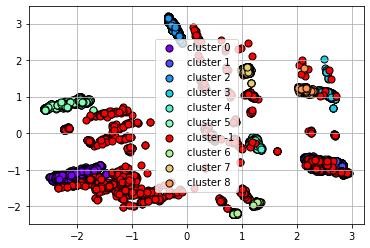

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

K_CLUSTERS = len(pca_X['cluster'].value_counts())

colors = mcm.rainbow(np.linspace(0, 1, K_CLUSTERS + 1))

# plot the clusters
for i in pca_X['cluster'].unique():   
    plt.scatter(
        pca_X_array[db_fitted.labels_ == i, 0], pca_X_array[db_fitted.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[db_fitted.labels_ == i, 0], 
                   pca_X_array[db_fitted.labels_ == i, 1], 
                   pca_X_array[db_fitted.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

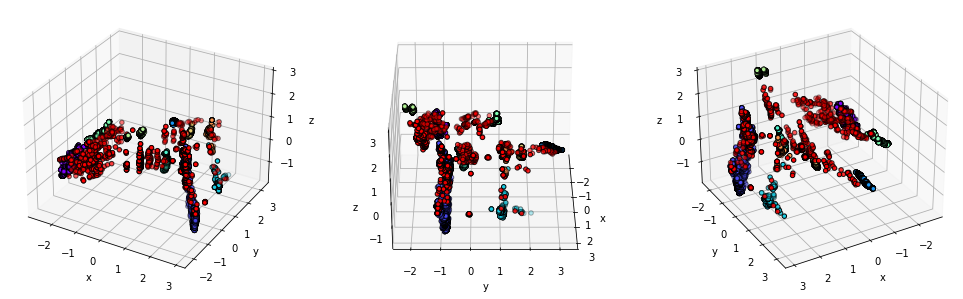

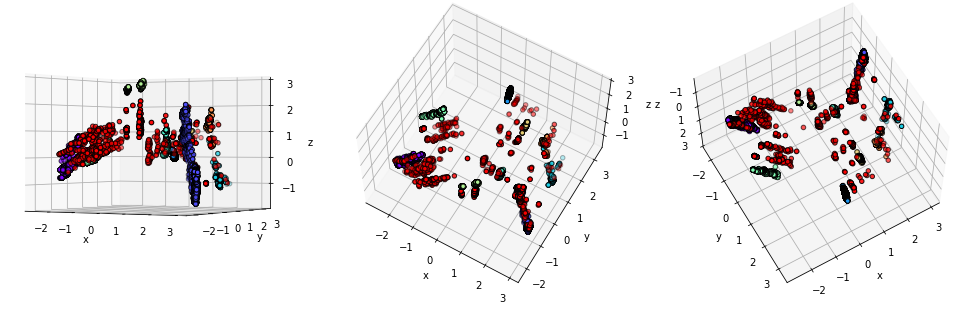

In [33]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [34]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [35]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -2.09473 -1.14859 -0.32133  0.17496 -0.26057 -0.03627  0.05466  0.12321   
1     -1.82399 -1.07054 -0.05254 -0.78069 -0.29503  0.28100 -0.06236  0.03714   
2     -1.80567 -1.10121  0.00604 -1.30124 -0.54897  0.09709 -0.41073 -0.18821   
3      2.67308 -0.87973 -0.96417 -0.56996 -0.15492 -0.12284 -0.24479 -0.23402   
4     -0.21862  2.92116  0.04068  0.49326 -0.17083 -0.46032  0.47497  0.38958   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736  1.00444 -1.52808  0.94138 -0.50731  0.32525 -0.08141 -0.31687 -0.55680   
40737 -0.13534  2.64984  0.20319 -0.55101 -0.22612 -0.16005 -0.04335  0.03752   
40738 -2.11025 -1.15627 -0.33063  0.18626 -0.25635 -0.03523  0.04701  0.12538   
40739 -0.20797  2.90799  0.00878  0.51024 -0.21836 -0.46974  0.42366  0.21958   
40740  2.18520 -0.87323  0.72859  0.34018 -0.07055 -0.38840  1.00375  0.98108   

             8        9       10       11       12       13       14       15  \
0     -0.17350 -0.02060 -0.01521  0.11677  0.14124 -0.03872 -0.17527 -0.19531   
1     -0.08452 -0.02130 -0.04848  0.09290  0.03952  0.04056  0.65349  0.04500   
2     -0.16527 -0.07827 -0.25315  0.03489 -0.03733  0.12412 -0.21967  0.12820   
3     -0.14461 -0.23764 -0.11485 -0.06713  0.12658  0.07547 -0.31174  0.13667   
4     -0.41099 -0.10310  0.07490  0.17702  0.04829 -0.12553 -0.08418 -0.05208   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736 -0.83083 -0.43532  0.17300  0.16683 -0.14460  0.65203  0.04802 -0.66203   
40737 -0.03615  0.00747  0.01717  0.01669  0.04349 -0.26747 -0.08170 -0.10519   
40738 -0.15867 -0.01554 -0.01981  0.08615  0.13763 -0.02081 -0.19741 -0.20517   
40739 -0.26610 -0.08411  0.01727  0.17996  0.00695 -0.14512 -0.03734 -0.04189   
40740 -0.03797  1.78607 -0.44997  0.73567 -0.04894  0.33018 -0.86843 -0.27602   

            16       17       18       19       20       21       22       23  \
0     -0.00993  0.00475  0.15856  0.06417  0.05314  0.05390 -0.07761  0.02825   
1      0.16648 -0.06766 -0.00058  0.19694 -0.14698 -0.00420 -0.00661 -0.18743   
2      0.21176 -0.02570 -0.20205 -0.03513  0.03196  0.11464 -0.22598  0.11560   
3      0.02438  0.09581  0.05729 -0.15467  0.09585 -0.10903  0.04416  0.00796   
4     -0.08033 -0.16179 -0.11998  0.25550 -0.04749  0.09106  0.07942  0.47093   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736  0.42987  1.30170 -0.43988  1.25299  0.15100  0.07971 -0.05371 -0.19291   
40737 -0.25460 -0.13455 -0.03785  0.09246  0.03847 -0.06827  0.02152 -0.03104   
40738 -0.02422 -0.01314  0.12473  0.07112  0.05065  0.05569 -0.07568  0.04154   
40739 -0.00413 -0.05287 -0.10698  0.14811 -0.00914  0.04998 -0.01262  0.16467   
40740 -0.03333 -0.05112  0.15866  0.51409 -1.04746 -0.74462 -0.60911  0.01079   

            24       25       26       27       28       29       30       31  \
0     -0.04367 -0.10357 -0.09126 -0.07949  0.04138 -0.02622  0.05176  0.05529   
1     -0.19344  0.14282  0.23164  0.10163 -0.31986  0.03240  0.05853  0.01708   
2     -0.01448 -0.04421 -0.07410 -0.03939 -0.05246 -0.07699 -0.09124 -0.04018   
3      0.21012  0.13760  0.29996  0.10118 -0.17944  0.01578  0.00189  0.04299   
4     -0.07145  0.43901  0.11118 -0.23425  0.10502  0.00081 -0.02452  0.02386   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40736  0.45156  0.03156  0.50364  0.54096  0.61229 -0.16923 -0.03884  0.22801   
40737 -0.02264 -0.19113  0.08459  0.11205 -0.05957  0.10211  0.01084  0.01786   
40738 -0.04171 -0.08686 -0.08910 -0.05289  0.00917 -0.03589  0.04627  0.02978   
40739 -0.02965  0.06370  0.04572  0.00917 -0.03866  0.01071 -0.02043  0.01319   
40740  0.49089 -0.18800  0.56806  0.98554  0.78489  0.00595  1.21908 -0.59838   

            32       33       34       35       36       37       38       39  \
0     -0.06712  0.23379 -0.06780  0.0388

In [36]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

result.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0          -1     1731      tcp    none         SF  orig_reg_or_dyn   
1           0    13519      udp     dns         SF  orig_reg_or_dyn   
2           1    10342      tcp     ssl         SF  orig_reg_or_dyn   
3           2     8290      udp     dns         SF  orig_reg_or_dyn   
4           3      959      tcp     ssl         SF  orig_reg_or_dyn   
5           4      815      udp     ntp         SF  orig_well_known   
6           5     2387      udp     dns         SF  orig_reg_or_dyn   
7           6     1557      tcp    none         SF  orig_reg_or_dyn   
8           7      639      udp     ntp         SF  orig_well_known   
9           8      502      tcp    http         SF  orig_reg_or_dyn   

        resp_p_cat  connection.time  connection.duration  \
0  resp_well_known          0.38983              0.01076   
1          resp_53          0.42296              0.00005   
2         resp_443          0.43470              0.03730   
3          resp_53          0.41733              0.00014   
4         resp_443          0.45484              0.05130   
5         resp_123          0.41587              0.00003   
6          resp_53          0.39737              0.00010   
7          resp_80          0.45100              0.00522   
8         resp_123          0.42727              0.00004   
9          resp_80          0.23687              0.03429   

   connection.orig_bytes  connection.orig_pkts  connection.resp_bytes  \
0                0.00191               0.00008                0.00001   
1                0.00015               0.00002                0.00000   
2                0.00231               0.00024                0.00014   
3                0.00009               0.00001                0.00000   
4                0.00428               0.00019                0.00006   
5                0.00008               0.00001                0.00000   
6                0.00011               0.00001                0.00000   
7                0.00321               0.00008                0.00001   
8                0.00008               0.00001                0.00000   
9                0.00178               0.00013                0.00004   

   connection.resp_pkts  dns_count  ssh_count  http_count  ssl_count  \
0               0.00006    0.22126    0.07452     0.02773    0.03697   
1               0.00001    1.00000    0.00000     0.00000    0.00000   
2               0.00024    0.00000    0.00000     0.24695    0.64668   
3               0.00001    1.00000    0.00000     0.00000    0.00000   
4               0.00019    0.00000    0.00000     0.00000    0.99791   
5               0.00001    0.00000    0.00000     0.00000    0.00000   
6               0.00001    1.00000    0.00000     0.00000    0.00000   
7               0.00004    0.00000    0.00000     0.08221    0.00000   
8               0.00001    0.00000    0.00000     0.00000    0.00000   
9               0.00013    0.00000    0.00000     0.77092    0.00000   

   files_count  
0      0.00135  
1      0.00000  
2      0.01702  
3      0.00000  
4      0.00784  
5      0.00000  
6      0.00000  
7      0.03535  
8      0.00000  
9      0.01574

In [37]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

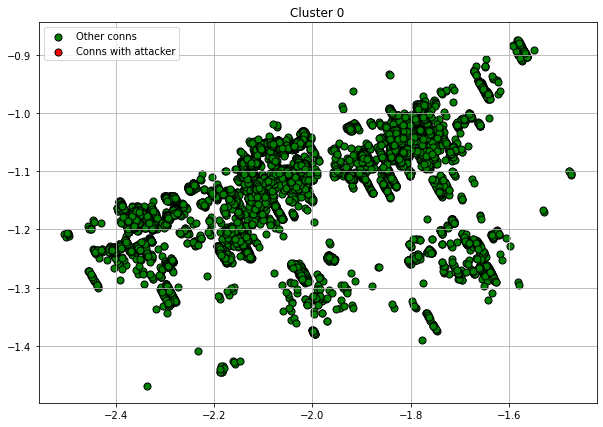

Total num of conns: 13519

Attacker conns ratio:
No    13519
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    3333
192.168.10.9     2025
192.168.10.5     1871
192.168.10.14    1604
192.168.10.17    1417
192.168.10.12    1066
192.168.10.8      940
192.168.10.16     821
192.168.10.25     279
192.168.10.51     163
Name: originated_ip, dtype: int64

192.168.10.3    13519
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.130432Z
timestamp max = 2017-07-06T13:29:59.425165Z

Cluster 0 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
8215   COQoaC3BZv2hp7cx2g            1.00000   192.168.10.9           0.85747   
8479   Cra3Fw2lMzy7rPo4z6            1.00000  192.168.10.14           0.85747   
31878  CmMBQq3lmgGJh12DN6            1.00000  192.168.10.51           0.85747   
14849  CCQDbM199tOuMXaHt5            1.00000  192.168.10.17           0.85747   
40254  CRWKm02EyzrpphJDyc            1.00000  192.168.10.17           0.85747   
29550   CPga16hByl3HOy7u7            1.00000  192.168.10.15           0.85747   
39664  CNUOih2tPjWaeWAOZ1            1.00000  192.168.10.15           0.85747   
8954    CG0Muwt2nywFKbEK4            1.00000   192.168.10.9           0.85747   
39208   CyVTnVXer73NafRp1            1.00000   192.168.10.5           0.85747   
14194  CUhdBC3XIGKx1JSxIk            1.00000  192.168.10.12           0.85747   
27908  CYEqBS2Aw58GB8NeRl            1.00000   192.168.10.9           0.85747   
31717   CwUDIT0zcvdxKNZL4            1.00000  192.168.10.15           0.85747   
13082  CmDpN03s8eqjKUZVll            1.00000  192.168.10.25           0.85747   
40647  CdjxVG1sOzuKdsnsda            1.00000   192.168.10.8           0.85747   
19323  C79tOY3nmrwDReMpSc            1.00000  192.168.10.15           0.85747   

       responded_ip                    timestamp  connection.time  duration  \
8215   192.168.10.3  2017-07-06T12:50:13.264792Z          0.33703   0.13749   
8479   192.168.10.3  2017-07-06T12:32:55.133106Z          0.04865   0.00016   
31878  192.168.10.3  2017-07-06T13:23:02.342435Z          0.88401   0.00026   
14849  192.168.10.3  2017-07-06T12:47:33.544008Z          0.29266   0.14181   
40254  192.168.10.3  2017-07-06T13:03:01.708599Z          0.55049   0.00102   
29550  192.168.10.3  2017-07-06T13:06:52.493082Z          0.61460   0.02418   
39664  192.168.10.3  2017-07-06T12:42:03.994011Z          0.20111   0.00021   
8954   192.168.10.3  2017-07-06T12:50:16.475707Z          0.33792   0.00019   
39208  192.168.10.3  2017-07-06T12:54:37.579562Z          0.41045   0.00017   
14194  192.168.10.3  2017-07-06T12:58:46.496848Z          0.47960   0.10737   
27908  192.168.10.3  2017-07-06T12:56:59.504902Z          0.44988   0.00016   
31717  192.168.10.3   2017-07-06T12:31:34.53135Z          0.02626   0.03118   
13082  192.168.10.3  2017-07-06T12:49:14.236641Z          0.32063   0.04851   
40647  192.168.10.3  2017-07-06T12:39:25.662675Z          0.15713   0.07868   
19323  192.168.10.3  2017-07-06T12:39:29.959064Z          0.15832   0.03293   

       connection.duration protocol service conn_state  connection.orig_p  \
8215               0.00010      udp     dns         SF            0.76132   
8479               0.00000      udp     dns         SF            0.81043   
31878              0.00000      udp     dns         SF            0.50082   
14849              0.00010      udp     dns         SF            0.53533   
40254              0.00000      udp     dns         SF            0.52833   
29550              0.00002      udp     dns         SF            0.80104   
39664              0.00000      udp     dns         SF            0.78500   
8954               0.00000      udp     dns         SF            0.79011   
39208              0.00000      udp     dns         SF            0.81548   
14194              0.00008      udp     dns         SF            0.12060   
27908              0.00000      udp     dns         SF            0.82988   
31717              0.00002      udp     dns         SF            0.84284   
13082              0.00004      udp     dns         SF            0.79271   
40647              0.00006      udp     dns         SF            0.79472   
19323              0.00002      udp     dns         SF            0.87198   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
8215    49893  orig_reg_or_dyn                0.00015       92   
8479    53111  orig_reg_or_dyn                0.00012       76   
31878   32822  orig_reg_or_dy

Protocol:
udp    13519
Name: protocol, dtype: int64

Service:
dns    13519
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    13519
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    13519
Name: resp_p_cat, dtype: int64




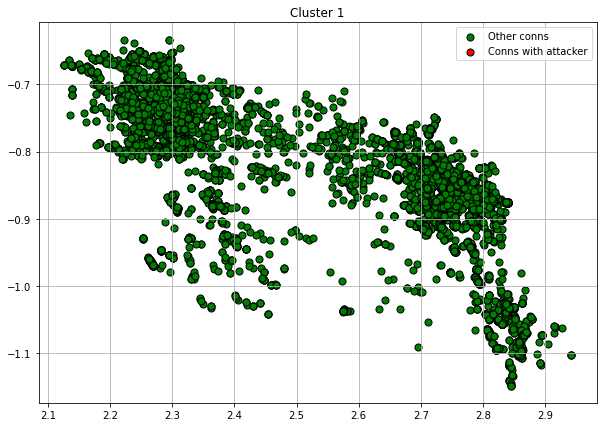

Total num of conns: 10342

Attacker conns ratio:
No    10342
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    2263
192.168.10.9     1316
192.168.10.5     1198
192.168.10.14    1190
192.168.10.17    1095
192.168.10.12     982
192.168.10.16     757
192.168.10.8      632
192.168.10.25     625
192.168.10.51     284
Name: originated_ip, dtype: int64

178.255.83.1      325
23.50.75.27       274
23.60.139.27      259
72.21.91.29       203
50.63.243.230     169
                 ... 
216.58.218.228      1
34.204.132.227      1
52.4.13.248         1
142.0.198.20        1
104.24.110.58       1
Name: responded_ip, Length: 2130, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.012429Z
timestamp max = 2017-07-06T13:29:59.873913Z

Cluster 1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
21665   CxhK5x3Zk9DZ2ypSb            1.00000   192.168.10.8           0.14388   
27101  Cb3sei1H7XWkZuMoI5            1.00000  192.168.10.12           0.39066   
18478   CrxNk2gZRKjRZ5bz2            1.00000  192.168.10.17           0.19139   
895    CXpWOs45EnhKoPfN4g            1.00000  192.168.10.14           0.42952   
20141  Cn8B214F9VEOPF1kl2            1.00000   192.168.10.8           0.08969   
33333   CkoTwZwXGp2eo3uZd            1.00000  192.168.10.15           0.15544   
23372  C08hb54ljngYGD68Pc            1.00000  192.168.10.15           0.13954   
32203  CvgKgm1Nmiz4yBZXY2            1.00000  192.168.10.25           0.76739   
2729   C6L3mz1QMSu6pZpyEb            1.00000  192.168.10.12           0.08692   
24958  Cuk89z4GAW4CyqDtsj            1.00000   192.168.10.9           0.94150   
32752  CbbVP14kNPwa8HYnFd            1.00000   192.168.10.5           0.08688   
5841   Chap703CNa41UeH3a7            1.00000  192.168.10.25           0.29182   
13270  Cw2Osk3hYtOUsbsEjb            1.00000  192.168.10.17           0.45475   
3700    C2qsZTi23kvNWXGAc            1.00000  192.168.10.17           0.14000   
5147   Cm5oK74cXjgCDZtawh            1.00000  192.168.10.25           0.27505   

         responded_ip                    timestamp  connection.time  duration  \
21665  35.186.231.122  2017-07-06T12:53:24.558194Z          0.39017 181.38503   
27101   89.255.249.53  2017-07-06T13:28:44.508449Z          0.97906   5.73944   
18478   46.45.154.110  2017-07-06T13:02:59.141289Z          0.54978  67.72065   
895     98.139.225.43  2017-07-06T13:04:24.522046Z          0.57350  15.91986   
20141  23.208.165.172  2017-07-06T12:54:23.157264Z          0.40644   5.76869   
33333   38.69.238.122  2017-07-06T13:22:56.555121Z          0.88241 120.47079   
23372   34.198.202.66  2017-07-06T12:39:34.464246Z          0.15958  61.24292   
32203    172.217.3.98  2017-07-06T13:18:30.626379Z          0.80854  92.01122   
2729     23.52.146.28  2017-07-06T12:58:43.833085Z          0.47886   0.36385   
24958  211.34.104.247  2017-07-06T12:52:25.465971Z          0.37375   1.59367   
32752     23.50.75.27  2017-07-06T12:50:39.998503Z          0.34445 116.10192   
5841    68.67.178.132   2017-07-06T12:56:04.19947Z          0.43451   0.13623   
13270    104.24.10.72  2017-07-06T12:32:09.315508Z          0.03592  46.12432   
3700     34.224.245.1  2017-07-06T12:30:00.780424Z          0.00021  10.65341   
5147   64.147.131.201  2017-07-06T13:26:32.643505Z          0.94243  29.99130   

       connection.duration protocol service conn_state  connection.orig_p  \
21665              0.13316      tcp     ssl         SF            0.76039   
27101              0.00421      tcp     ssl         SF            0.50539   
18478              0.04971      tcp     ssl         SF            0.59538   
895                0.01169      tcp    http         SF            0.91401   
20141              0.00423      tcp     ssl         SF            0.76078   
33333              0.08844      tcp     ssl         SF            0.81407   
23372              0.04496      tcp     ssl         SF            0.79839   
32203              0.06755      tcp     ssl         SF            0.76114   
2729               0.00027      tcp     ssl         SF            0.91265   
24958              0.00117      tcp     ssl         SF            0.02860   
32752              0.08523      tcp    http         SF            0.76616   
5841               0.00010      tcp     ssl         SF            0.75773   
13270              0.03386      tcp    http         SF            0.52983   
3700               0.00782      tcp    none         SF            0.82572   
5147               0.02202      tcp     ssl         SF            0.76288   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
21665   49832  orig_reg_or_dyn                0.00186     1163   
27101   33122  orig_reg_or_dyn                0.00057      354 

Protocol:
tcp    10342
Name: protocol, dtype: int64

Service:
ssl     6688
http    2548
none    1106
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    10342
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           6660
resp_80            3615
resp_well_known      64
resp_reg              3
Name: resp_p_cat, dtype: int64




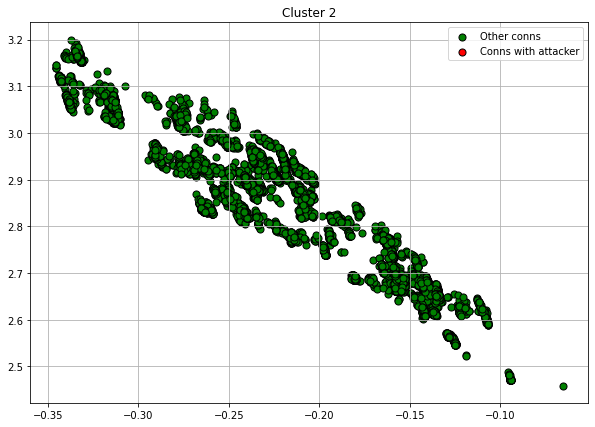

Total num of conns: 8290

Attacker conns ratio:
No    8290
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    8290
Name: originated_ip, dtype: int64

192.168.10.1    8290
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.119093Z
timestamp max = 2017-07-06T13:29:59.41753Z

Cluster 2 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
31815  Ccshjy1H2a9REHVaKe            1.00000  192.168.10.3           0.85747   
5312   CdwVmi3MtpKyugekM9            1.00000  192.168.10.3           0.85747   
27503  ClZHIY1O0L0ntn7l29            1.00000  192.168.10.3           0.85747   
29861  Cf4pNp2lXCqfvHy3s9            1.00000  192.168.10.3           0.85747   
2776   CbdZSx3Vt8D2ZbDGR4            1.00000  192.168.10.3           0.85747   
30579  C7B88H1zdZ6qJohp7l            1.00000  192.168.10.3           0.85747   
28046  Cx6UuI3LrF3ddVjuB5            1.00000  192.168.10.3           0.85747   
36933  Cr2I3r1hKJOtIqWEuk            1.00000  192.168.10.3           0.85747   
16     CY85kA12zDNeF6U961            1.00000  192.168.10.3           0.85747   
29640  CoIiML1oXBLFd11h6k            1.00000  192.168.10.3           0.85747   
36942  CFnm2J1bxJpKAq9pgd            1.00000  192.168.10.3           0.85747   
34707  CAHpBU3t7KSpTcVkae            1.00000  192.168.10.3           0.85747   
18125  CPdmK02uqlCu6QJKdb            1.00000  192.168.10.3           0.85747   
24491  CkxsKv3WScwxmUcye6            1.00000  192.168.10.3           0.85747   
6666    Cc1RXT1GvDpyVJng8            1.00000  192.168.10.3           0.85747   

       responded_ip                    timestamp  connection.time  duration  \
31815  192.168.10.1  2017-07-06T12:45:38.714254Z          0.26076   0.02307   
5312   192.168.10.1  2017-07-06T12:43:05.669048Z          0.21825   0.05914   
27503  192.168.10.1  2017-07-06T12:51:30.278875Z          0.35842   0.02409   
29861  192.168.10.1  2017-07-06T13:06:53.084967Z          0.61477   0.11615   
2776   192.168.10.1  2017-07-06T12:30:00.119093Z          0.00003   0.00000   
30579  192.168.10.1  2017-07-06T12:41:37.860029Z          0.19385   0.30286   
28046  192.168.10.1  2017-07-06T13:06:52.746283Z          0.61467   0.04681   
36933  192.168.10.1  2017-07-06T12:53:10.927293Z          0.38638   0.13883   
16     192.168.10.1  2017-07-06T12:58:43.771485Z          0.47884   0.11968   
29640  192.168.10.1   2017-07-06T12:53:25.51691Z          0.39043   0.11597   
36942  192.168.10.1  2017-07-06T12:39:37.075154Z          0.16030   0.05058   
34707  192.168.10.1  2017-07-06T13:09:48.018932Z          0.66336   0.02362   
18125  192.168.10.1   2017-07-06T13:14:54.07963Z          0.74838   0.09850   
24491  192.168.10.1  2017-07-06T12:39:26.537707Z          0.15737   0.09087   
6666   192.168.10.1  2017-07-06T12:46:40.288666Z          0.27787   0.04637   

       connection.duration protocol service conn_state  connection.orig_p  \
31815              0.00002      udp     dns         SF            0.93385   
5312               0.00004      udp     dns         SF            0.93510   
27503              0.00002      udp     dns         SF            0.92291   
29861              0.00009      udp     dns         SF            0.91636   
2776               0.00000      udp     dns        SHR            0.93974   
30579              0.00022      udp     dns         SF            0.93980   
28046              0.00003      udp     dns         SF            0.91775   
36933              0.00010      udp     dns         SF            0.95169   
16                 0.00009      udp     dns         SF            0.91715   
29640              0.00009      udp     dns         SF            0.93821   
36942              0.00004      udp     dns         SF            0.93565   
34707              0.00002      udp     dns         SF            0.92932   
18125              0.00007      udp     dns         SF            0.93969   
24491              0.00007      udp     dns         SF            0.93403   
6666               0.00003      udp     dns         SF            0.93125   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
31815   61199  orig_reg_or_dyn                0.00008       51   
5312    61281  orig_reg_or_dyn                0.00008       52   
27503   60482  orig_reg_or_dyn               

Protocol:
udp    8290
Name: protocol, dtype: int64

Service:
dns    8290
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8290
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    8290
Name: resp_p_cat, dtype: int64




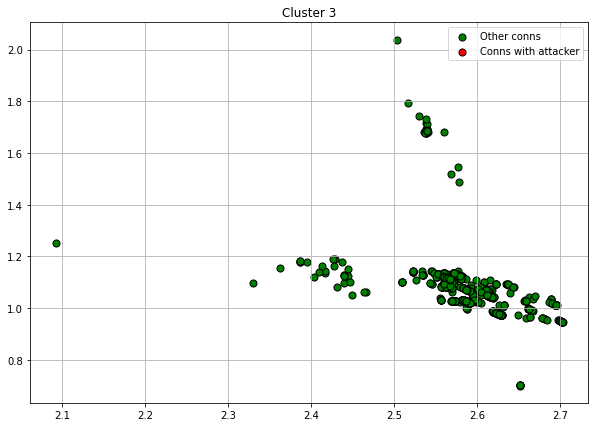

Total num of conns: 959

Attacker conns ratio:
No    959
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    936
192.168.10.3      23
Name: originated_ip, dtype: int64

74.117.200.68     22
23.52.146.2       22
172.217.10.66     16
172.217.10.2      10
192.0.77.32       10
                  ..
104.97.120.69      1
96.17.33.206       1
144.76.168.9       1
119.205.194.11     1
72.14.246.86       1
Name: responded_ip, Length: 468, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:01.043339Z
timestamp max = 2017-07-06T13:29:55.029938Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
35115  Cw343w3oN3Naftpflh            1.00000  192.168.10.19           0.96467   
17485  CiVnql10WEsMk7AKT8            1.00000  192.168.10.19           0.21936   
4543   CuvSJj3aXruD1QS11d            1.00000  192.168.10.19           0.77238   
30849  CmguXB3FhcVTKgw534            1.00000  192.168.10.19           0.27217   
37413  ChTvN61NJeUL9J4Iif            1.00000  192.168.10.19           0.76739   
4204   COuMBi2tR2VdbVT42l            1.00000  192.168.10.19           0.72247   
263     CuGt2Oy2o0x3iKAae            1.00000  192.168.10.19           0.77155   
973    C9oUaM3NbTMVxTS4Z1            1.00000  192.168.10.19           0.76739   
2253   CdUSkt1uLS75Vu8e6c            1.00000  192.168.10.19           0.30919   
23333   CTBrfI6xTFRFHXSkl            1.00000  192.168.10.19           0.76739   
29064  CqYMI53Jnx7ixoI6A8            1.00000  192.168.10.19           0.21935   
15506   Cvc9GI1C8jGpOYxwa            1.00000  192.168.10.19           0.23096   
20851  CJAgJ44WcftTgFHUaa            1.00000   192.168.10.3           0.16478   
26547  CEpkGh21gNjBEsSRme            1.00000  192.168.10.19           0.76739   
14922  CvLyVa2gVlKam8dxB7            1.00000  192.168.10.19           0.30919   

          responded_ip                    timestamp  connection.time  \
35115   216.58.219.230   2017-07-06T12:37:45.86915Z          0.12941   
17485     52.84.40.176  2017-07-06T13:27:51.658188Z          0.96438   
4543   173.241.242.143  2017-07-06T12:53:12.886917Z          0.38692   
30849   63.241.108.104  2017-07-06T13:22:24.820336Z          0.87359   
37413    172.217.6.195  2017-07-06T12:56:59.077043Z          0.44976   
4204    162.247.242.20  2017-07-06T12:41:41.309426Z          0.19481   
263    173.194.204.157  2017-07-06T12:56:57.763915Z          0.44939   
973      172.217.10.78  2017-07-06T12:33:48.626446Z          0.06351   
2253       72.21.81.48   2017-07-06T12:53:13.18243Z          0.38701   
23333     172.217.11.3  2017-07-06T12:53:17.555265Z          0.38822   
29064     52.84.26.217  2017-07-06T13:11:37.401746Z          0.69375   
15506     54.225.72.37  2017-07-06T13:27:52.912657Z          0.96473   
20851    40.83.143.209  2017-07-06T12:51:10.573559Z          0.35295   
26547   172.217.12.161  2017-07-06T12:53:15.844553Z          0.38775   
14922      72.21.81.48  2017-07-06T12:53:12.445484Z          0.38680   

       duration  connection.duration protocol service conn_state  \
35115 116.73536              0.08570      tcp     ssl         SF   
17485 116.15053              0.08527      tcp     ssl         SF   
4543   31.63512              0.02322      tcp     ssl         SF   
30849  11.68161              0.00858      tcp     ssl       RSTR   
37413 115.50427              0.08479      tcp     ssl         SF   
4204  116.00436              0.08516      tcp     ssl         SF   
263   115.83096              0.08503      tcp     ssl         SF   
973   116.80990              0.08575      tcp     ssl         SF   
2253  117.21994              0.08605      tcp     ssl         SF   
23333 115.85922              0.08505      tcp     ssl         SF   
29064 115.72577              0.08496      tcp     ssl         SF   
15506  60.88355              0.04470      tcp     ssl         SF   
20851 109.84255              0.08064      tcp     ssl         SF   
26547 116.57000              0.08558      tcp     ssl         SF   
14922 115.95565              0.08512      tcp     ssl         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
35115            0.73234   47994  orig_reg_or_dyn                0.00917   
17485            0.72679   47630  orig_reg_or_dyn                0.00122   
4543             0.63077   41338  orig_reg_or_dyn                0.00337   
30849            0.65085   42654  orig_reg_or_dyn                0.00206   
37413            0.79654   52201  orig_reg_or_dyn                0.00159   
4204             0.65923   

Protocol:
tcp    959
Name: protocol, dtype: int64

Service:
ssl     957
none      2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    959
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           954
resp_well_known      5
Name: resp_p_cat, dtype: int64




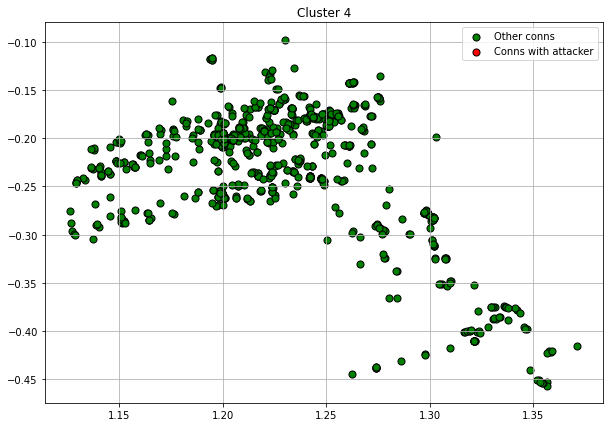

Total num of conns: 815

Attacker conns ratio:
No    815
Name: attacker_label, dtype: int64

IPs:
192.168.10.17    567
192.168.10.12    113
192.168.10.16     80
192.168.10.25     55
Name: originated_ip, dtype: int64

17.253.14.253      55
167.114.204.238    53
144.217.148.73     52
159.203.8.72       52
91.189.89.199      52
91.189.91.157      31
66.70.172.17       30
199.182.221.110    30
206.75.89.101      30
99.224.25.39       30
198.50.139.209     30
206.108.0.133      30
206.108.0.134      30
206.108.0.132      30
91.189.89.198      30
208.81.1.197       30
158.69.125.231     29
129.128.12.20      29
144.217.252.208    29
206.108.0.131      29
72.38.129.202      22
67.215.197.149     20
129.250.35.250     20
97.127.97.146      19
207.210.46.249     19
97.107.128.58       2
158.69.247.184      2
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:02.014632Z
timestamp max = 2017-07-06T13:29:48.035953Z

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
22305  CBYsMi4LRZKnraFJTk            1.00000  192.168.10.17           0.39857   
21277   CbPrQP2I8yx77Xwwj            1.00000  192.168.10.17           0.39857   
29719  CxUXX74Lz3Pn5Z5qeh            1.00000  192.168.10.17           0.39857   
945    CwMPxS2oTLyf8Uqhoc            1.00000  192.168.10.17           0.91949   
11722  Cdnurp2u2XRtav5j66            1.00000  192.168.10.16           0.28990   
7979    Cz2OdKYfWmXsBBuxi            1.00000  192.168.10.17           0.92007   
662    CwTCo729Z03fYLwEtk            1.00000  192.168.10.17           0.64009   
35465  CZ8Dt52M63yLYiDoB9            1.00000  192.168.10.12           0.39857   
5203   CFAAU23n1BwvaHy7o2            1.00000  192.168.10.17           0.64009   
21510  CBbIFa1WMGTTRCZmg6            1.00000  192.168.10.25           0.06320   
40534  CHMzSW1QnLTMgfaBbd            1.00000  192.168.10.17           0.92007   
2168   C1mcp43M2R5E6HcwT1            1.00000  192.168.10.16           0.42475   
19037   CWy6uN1ybiDW7wrFk            1.00000  192.168.10.17           0.39857   
12333  C9Eqau4hHtvGb7j36e            1.00000  192.168.10.17           0.57028   
15433  CiirST35Qdy9qeF2J2            1.00000  192.168.10.17           0.43557   

          responded_ip                    timestamp  connection.time  \
22305    91.189.91.157  2017-07-06T12:35:09.033032Z          0.08584   
21277    91.189.89.199  2017-07-06T13:26:32.035979Z          0.94227   
29719    91.189.89.198  2017-07-06T13:13:36.035793Z          0.72670   
945      206.75.89.101   2017-07-06T13:13:29.03579Z          0.72476   
11722   67.215.197.149   2017-07-06T12:30:02.07428Z          0.00057   
7979     206.108.0.133  2017-07-06T13:05:45.035692Z          0.59586   
662    144.217.252.208  2017-07-06T12:55:20.035092Z          0.42224   
35465    91.189.89.199  2017-07-06T13:12:28.015863Z          0.70781   
5203   144.217.252.208  2017-07-06T12:59:43.035379Z          0.49530   
21510    17.253.14.253  2017-07-06T12:53:37.660329Z          0.39381   
40534    206.108.0.133  2017-07-06T13:25:29.035923Z          0.92476   
2168     97.127.97.146  2017-07-06T12:42:59.074858Z          0.21641   
19037    91.189.89.199  2017-07-06T13:13:23.035792Z          0.72309   
12333    129.128.12.20  2017-07-06T12:42:10.033725Z          0.20279   
15433     99.224.25.39  2017-07-06T13:26:10.035991Z          0.93615   

       duration  connection.duration protocol service conn_state  \
22305   0.03667              0.00003      udp     ntp         SF   
21277   0.09864              0.00007      udp     ntp         SF   
29719   0.09417              0.00007      udp     ntp         SF   
945     0.09301              0.00007      udp     ntp         SF   
11722   0.02431              0.00002      udp     ntp         SF   
7979    0.02228              0.00002      udp     ntp         SF   
662     0.01647              0.00001      udp     ntp         SF   
35465   0.09416              0.00007      udp     ntp         SF   
5203    0.01633              0.00001      udp     ntp         SF   
21510   0.02375              0.00002      udp     ntp         SF   
40534   0.02225              0.00002      udp     ntp         SF   
2168    0.05096              0.00004      udp     ntp         SF   
19037   0.09418              0.00007      udp     ntp         SF   
12333   0.09347              0.00007      udp     ntp         SF   
15433   0.05675              0.00004      udp     ntp         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
22305            0.00183     123  orig_well_known                0.00008   
21277            0.00183     123  orig_well_known                0.00008   
29719            0.00183     123  orig_well_known                0.00008   
945              0.00183     123  orig_well_known                0.00008   
11722            0.00183     123  orig_well_known                0.00008   
7979             0.00183   

Protocol:
udp    815
Name: protocol, dtype: int64

Service:
ntp    815
Name: service, dtype: int64

Orig_p_cat:
orig_well_known    815
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123    815
Name: resp_p_cat, dtype: int64




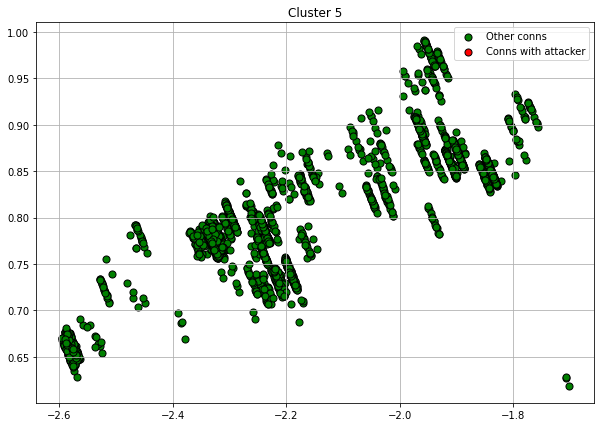

Total num of conns: 2387

Attacker conns ratio:
No    2387
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    2387
Name: originated_ip, dtype: int64

192.168.10.3    2387
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.052189Z
timestamp max = 2017-07-06T13:29:55.03007Z

Cluster 5 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
39833  Cfdrf34x6nfL5IpABg            1.00000  192.168.10.19           0.85747   
25614   CR2AJnz9p2YZd9QSa            1.00000  192.168.10.19           0.85747   
27623    CBHzGM4NHp7TibqT            1.00000  192.168.10.19           0.85747   
31      CCFfpaWTwp7O1ZcLk            1.00000  192.168.10.19           0.85747   
31231   CP38qSJJm238lwXBk            1.00000  192.168.10.19           0.85747   
4373    Cf6D2jvUUoJ8GYyk7            1.00000  192.168.10.19           0.85747   
38456   Co1H5d7nJUjIu93Je            1.00000  192.168.10.19           0.85747   
15053  C7J9H44iuJkFGcl2vf            1.00000  192.168.10.19           0.85747   
2186   CRn6ZG3hrZWYv0YGwj            1.00000  192.168.10.19           0.85747   
27701  CL7BiP33fj4iFtmu7j            1.00000  192.168.10.19           0.85747   
13478  ClpDyz1qE4M3EQSM0a            1.00000  192.168.10.19           0.85747   
10656  CErjoG3bEOHrF3kQH5            1.00000  192.168.10.19           0.85747   
38789  CdmQTP26uWZrjdrBf4            1.00000  192.168.10.19           0.85747   
38264  CLIwWF244Tj4Khwehj            1.00000  192.168.10.19           0.85747   
1535   Cb6ZQa1z3yJ1vQiHra            1.00000  192.168.10.19           0.85747   

       responded_ip                    timestamp  connection.time  duration  \
39833  192.168.10.3  2017-07-06T13:14:18.003083Z          0.73836   0.00016   
25614  192.168.10.3  2017-07-06T12:53:21.287743Z          0.38926   0.04922   
27623  192.168.10.3  2017-07-06T12:37:40.531744Z          0.12793   0.08543   
31     192.168.10.3  2017-07-06T13:28:02.136162Z          0.96729   0.09813   
31231  192.168.10.3  2017-07-06T12:41:41.813822Z          0.19495   0.03276   
4373   192.168.10.3  2017-07-06T12:45:22.195437Z          0.25617   0.02592   
38456  192.168.10.3  2017-07-06T12:33:50.836605Z          0.06412   0.18234   
15053  192.168.10.3  2017-07-06T12:37:45.176743Z          0.12922   0.03086   
2186   192.168.10.3  2017-07-06T12:37:44.614188Z          0.12906   0.03123   
27701  192.168.10.3  2017-07-06T12:37:41.021496Z          0.12806   0.06657   
13478  192.168.10.3  2017-07-06T12:38:06.491221Z          0.13514   0.00022   
10656  192.168.10.3   2017-07-06T12:53:12.46384Z          0.38681   0.12277   
38789  192.168.10.3  2017-07-06T12:37:41.022024Z          0.12806   0.00022   
38264  192.168.10.3  2017-07-06T12:33:48.822755Z          0.06356   0.03111   
1535   192.168.10.3  2017-07-06T12:41:38.643548Z          0.19407   0.03415   

       connection.duration protocol service conn_state  connection.orig_p  \
39833              0.00000      udp     dns         SF            0.23851   
25614              0.00004      udp     dns         SF            0.51348   
27623              0.00006      udp     dns         SF            0.12873   
31                 0.00007      udp     dns         SF            0.04807   
31231              0.00002      udp     dns         SF            0.21617   
4373               0.00002      udp     dns         SF            0.73555   
38456              0.00013      udp     dns         SF            0.43344   
15053              0.00002      udp     dns         SF            0.53076   
2186               0.00002      udp     dns         SF            0.93189   
27701              0.00005      udp     dns         SF            0.90406   
13478              0.00000      udp     dns         SF            0.26584   
10656              0.00009      udp     dns         SF            0.06254   
38789              0.00000      udp     dns         SF            0.43511   
38264              0.00002      udp     dns         SF            0.65516   
1535               0.00003      udp     dns         SF            0.25423   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
39833   15633  orig_reg_or_dyn                0.00007       46   
25614   33652  orig_reg_or_dyn                0.00010       64   
27623    8439  orig_reg_or_dy

Protocol:
udp    2387
Name: protocol, dtype: int64

Service:
dns    2387
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2387
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    2387
Name: resp_p_cat, dtype: int64




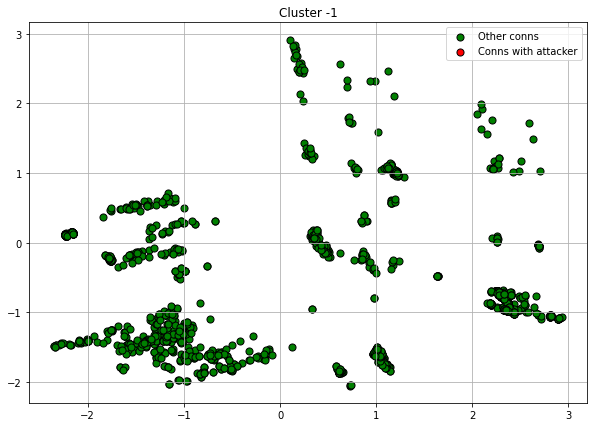

Total num of conns: 1731

Attacker conns ratio:
No    1731
Name: attacker_label, dtype: int64

IPs:
192.168.10.50     337
192.168.10.17     225
192.168.10.12     178
192.168.10.51     160
192.168.10.9      159
192.168.10.25     144
192.168.10.16     114
192.168.10.19      88
192.168.10.5       87
192.168.10.15      85
192.168.10.8       60
192.168.10.14      59
192.168.10.3       33
109.201.130.57      1
109.201.130.58      1
Name: originated_ip, dtype: int64

192.168.10.3       565
192.168.10.50      199
192.168.10.255     141
192.168.10.19       99
185.170.48.239      45
                  ... 
91.189.88.161        1
198.232.125.113      1
23.208.94.91         1
37.157.2.42          1
209.85.201.155       1
Name: responded_ip, Length: 196, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.049978Z
timestamp max = 2017-07-06T13:29:59.42517Z

Cluster -1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
37183  C2a9BR2NCQpaYgi7K6            1.00000  192.168.10.50           0.70111   
29589  CCYeM01UgPxCQw2q3i            1.00000   192.168.10.9           0.85747   
35870   C6Xz9bmFtBqHi9K5g            1.00000  192.168.10.16           0.85747   
31681  CT3MTj4kpL5fYrU5ej            1.00000  192.168.10.17           0.93757   
11043   CSOql7nGkAZzwOek2            1.00000   192.168.10.9           0.79469   
17508  Cho40Y2eeD9531wmVd            1.00000  192.168.10.12           0.90438   
27024  C3hsBR229V4mAmONC9            1.00000  192.168.10.15           0.85747   
39694   CH3dyFeMc61310na8            1.00000  192.168.10.50           0.85747   
33659  Cuq60b16LV7dL2bQR5            1.00000  192.168.10.17           0.76739   
15983  C06cj13YOeZo5NHgz7            1.00000  192.168.10.15           0.20912   
13531  CfrIvd4VtURtAhbHd9            1.00000  192.168.10.17           0.85747   
2350   CuuFm72LCPvAnNvIkg            1.00000  192.168.10.17           0.85747   
38620  Cq8vs84qGAGQUq5C48            1.00000  192.168.10.25           0.85747   
8209    CioKb2w7nrZBPzu04            1.00000  192.168.10.51           0.85747   
17700  CDUT1Q1yEFB6UJQfh1            1.00000  192.168.10.19           0.85747   

          responded_ip                    timestamp  connection.time  \
37183   158.69.125.231  2017-07-06T12:30:12.448568Z          0.00345   
29589     192.168.10.3  2017-07-06T12:33:56.191264Z          0.06561   
35870    192.168.10.50  2017-07-06T13:14:51.185471Z          0.74758   
31681    210.69.89.199  2017-07-06T13:26:10.934431Z          0.93640   
11043   178.217.128.81  2017-07-06T12:30:03.942999Z          0.00109   
17508  202.248.252.160  2017-07-06T13:23:03.652606Z          0.88438   
27024    192.168.10.50  2017-07-06T13:25:49.353795Z          0.93041   
39694     192.168.10.3   2017-07-06T12:47:20.28714Z          0.28898   
33659    172.217.10.98  2017-07-06T12:30:09.164436Z          0.00254   
15983     50.19.232.30  2017-07-06T12:30:08.667998Z          0.00240   
13531    192.168.10.50  2017-07-06T12:38:52.653363Z          0.14796   
2350      192.168.10.3   2017-07-06T12:47:06.03458Z          0.28502   
38620     192.168.10.3  2017-07-06T12:31:02.511833Z          0.01736   
8209      192.168.10.3  2017-07-06T12:43:52.427581Z          0.23124   
17700     192.168.10.3  2017-07-06T12:31:28.664573Z          0.02463   

       duration  connection.duration protocol   service conn_state  \
37183   0.01644              0.00001      udp       ntp         SF   
29589   0.00024              0.00000      udp       ntp         SF   
35870   0.01481              0.00001      tcp  ftp-data         SF   
31681   0.00000              0.00000      tcp      none         S0   
11043  64.89428              0.04764      tcp      none        OTH   
17508   0.00000              0.00000      tcp      none         S0   
27024   1.46809              0.00108      tcp       ssh         SF   
39694   0.00122              0.00000      tcp   krb_tcp       RSTR   
33659  54.91788              0.04032      tcp      none         SF   
15983 333.88489              0.24511      tcp      none        OTH   
13531   0.14672              0.00011      tcp       ftp         SF   
2350    0.00015              0.00000      udp       ntp         SF   
38620 118.96819              0.08734      tcp      none       RSTR   
8209    0.00016              0.00000      udp      none         SF   
17700   0.00070              0.00000      udp       krb         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
37183            0.00183     123  orig_well_known                0.00008   
29589            0.00183     123  orig_well_known                0.00015   
35870            0.71162   46636  orig_reg_or_dyn                0.01644   
31681            0.79367   52013  orig_reg_or_dyn                0.00000   
11043            0.01900    1248  orig_reg_or_dyn                0.0000

Protocol:
tcp     908
udp     820
icmp      3
Name: protocol, dtype: int64

Service:
none                  557
dns                   398
ntp                   317
ssh                   129
ftp-data               79
ssl                    64
http                   48
krb                    38
ftp                    36
gssapi,dce_rpc,smb     20
gssapi,smb,krb         17
krb_tcp                16
dce_rpc                 8
gssapi,ntlm,smb         4
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1212
orig_well_known     519
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_well_known    408
resp_443           398
resp_123           317
resp_53            188
resp_22            129
resp_80            121
resp_reg           115
resp_21             36
resp_dyn            19
Name: resp_p_cat, dtype: int64




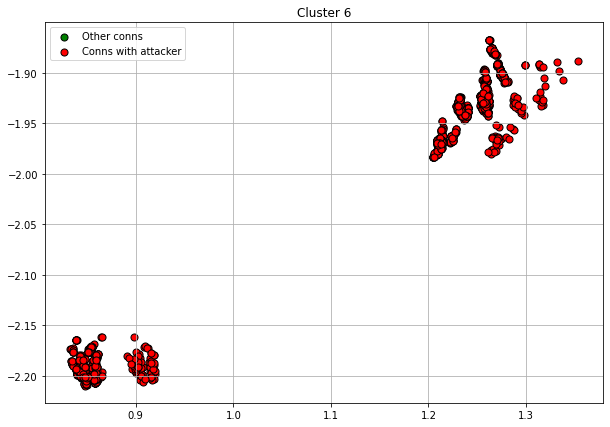

Total num of conns: 1557

Attacker conns ratio:
Yes    1557
Name: attacker_label, dtype: int64

IPs:
172.16.0.1    1557
Name: originated_ip, dtype: int64

192.168.10.50    1557
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.058094Z
timestamp max = 2017-07-06T13:29:58.713386Z

Cluster 6 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
19365  CqAKvW3lyqnFPUFTua            0.75149    172.16.0.1           0.85747   
17593    C4cqYhsyz6zHuC6J            0.75149    172.16.0.1           0.85747   
35154  Csh7OL2BswXk5VQZYe            0.75149    172.16.0.1           0.85747   
7837    CsoKEhAqKqBlTUwui            0.75149    172.16.0.1           0.85747   
13089  CXeAV24W555kIwRrj8            0.75149    172.16.0.1           0.85747   
31963   CGmR6cx1H8YhKeR9e            0.75149    172.16.0.1           0.85747   
11782  C0kgzP2xTUPpZBqiVc            0.75149    172.16.0.1           0.85747   
16436  C2FyL33cdsy6S81cZ6            0.75149    172.16.0.1           0.85747   
9906   Cz69am1upBjDBbO59k            0.75149    172.16.0.1           0.85747   
18220  CUwyeF3Zq7xtTnezrc            0.75149    172.16.0.1           0.85747   
20544   CPVjmvJLxlSFm4eo2            0.75149    172.16.0.1           0.85747   
20976  C5CG5v1vpwVRc5dLs1            0.75149    172.16.0.1           0.85747   
28450  CuQk0K2CJauyp5tbPd            0.75149    172.16.0.1           0.85747   
1320    C6ENpNpLGxkBRmX31            0.75149    172.16.0.1           0.85747   
19091   Co7vXBzmLT6GxB0O5            0.75149    172.16.0.1           0.85747   

        responded_ip                    timestamp  connection.time  duration  \
19365  192.168.10.50  2017-07-06T12:50:08.784774Z          0.33578   5.68597   
17593  192.168.10.50  2017-07-06T12:59:09.465049Z          0.48598  33.00653   
35154  192.168.10.50  2017-07-06T12:40:48.467042Z          0.18013   8.80682   
7837   192.168.10.50  2017-07-06T13:23:19.514448Z          0.88878   5.21114   
13089  192.168.10.50  2017-07-06T13:20:14.088992Z          0.83728   5.58662   
31963  192.168.10.50  2017-07-06T12:33:55.753693Z          0.06549   5.41191   
11782  192.168.10.50  2017-07-06T12:30:56.275954Z          0.01563   5.83918   
16436  192.168.10.50  2017-07-06T12:35:53.323305Z          0.09815   5.87947   
9906   192.168.10.50  2017-07-06T13:23:06.736484Z          0.88524   5.98609   
18220  192.168.10.50  2017-07-06T12:44:07.351967Z          0.23538   5.00740   
20544  192.168.10.50  2017-07-06T12:50:15.104038Z          0.33754   5.36842   
20976  192.168.10.50  2017-07-06T13:27:31.555924Z          0.95880   5.24201   
28450  192.168.10.50  2017-07-06T12:37:53.626003Z          0.13156   5.60877   
1320   192.168.10.50  2017-07-06T12:31:55.311443Z          0.03203   5.82348   
19091  192.168.10.50   2017-07-06T12:45:19.62346Z          0.25546   5.75867   

       connection.duration protocol service conn_state  connection.orig_p  \
19365              0.00417      tcp    none         SF            0.65177   
17593              0.02423      tcp    http         SF            0.77885   
35154              0.00647      tcp    http         SF            0.51965   
7837               0.00383      tcp    none         SF            0.86638   
13089              0.00410      tcp    none         SF            0.83632   
31963              0.00397      tcp    none         SF            0.85372   
11782              0.00429      tcp    none         SF            0.81126   
16436              0.00432      tcp    none         SF            0.88103   
9906               0.00439      tcp    none         SF            0.86434   
18220              0.00368      tcp    none         SF            0.56643   
20544              0.00394      tcp    none         SF            0.65323   
20976              0.00385      tcp    none         SF            0.90756   
28450              0.00412      tcp    none         SF            0.90933   
1320               0.00428      tcp    none         SF            0.82512   
19091              0.00423      tcp    none         SF            0.58343   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
19365   42714  orig_reg_or_dyn                0.00000        0   
17593   51042  orig_reg_or_dyn                0.07045    43951   
35154   34056  orig_reg_or_dy

Protocol:
tcp    1557
Name: protocol, dtype: int64

Service:
none    1430
http     127
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1557
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80    1557
Name: resp_p_cat, dtype: int64




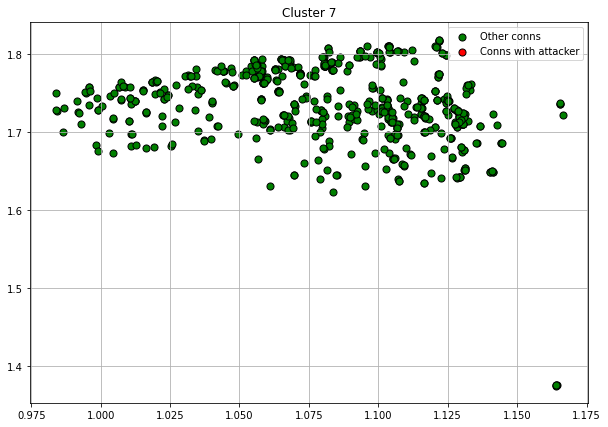

Total num of conns: 639

Attacker conns ratio:
No    639
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    639
Name: originated_ip, dtype: int64

144.217.148.73     34
91.189.91.157      34
192.95.27.155      34
192.99.2.8         34
129.128.12.20      34
91.189.89.199      34
163.172.10.212     34
206.108.0.132      34
67.215.197.149     34
91.189.89.198      34
75.119.251.14      34
167.114.204.238    34
144.217.109.67     34
213.109.127.82     33
195.186.4.101      33
158.69.247.184     33
159.203.8.72       33
5.9.74.228         33
72.38.129.202      32
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.269404Z
timestamp max = 2017-07-06T13:29:58.27155Z

Cluster 7 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
19584  Cq0xJH2JhcVZEChvfg            1.00000  192.168.10.19           0.28990   
21337   Cq8G95fGoJJhKov7g            1.00000  192.168.10.19           0.64008   
27241  CxnqKN142zAMis7uDf            1.00000  192.168.10.19           0.85624   
29819  CnZxDI38pWMFc4Enne            1.00000  192.168.10.19           0.70112   
9910   CHWojA2bodwXftv7rk            1.00000  192.168.10.19           0.64008   
7937   CSrDW04nUrIEKibI06            1.00000  192.168.10.19           0.39857   
8943   Ctm8K01E65sYrxtERf            1.00000  192.168.10.19           0.85624   
26256  CPyqSx3RVs3vX1plni            1.00000  192.168.10.19           0.39857   
27126  CQ8bOt2DYawqKgJ9F3            1.00000  192.168.10.19           0.95192   
33994    CuAMb5oRIZPpy7M4            1.00000  192.168.10.19           0.85617   
2768   CEoC9A26stxmVbMFsl            1.00000  192.168.10.19           0.92007   
27145  CaIhgA1xNiHovyy9Be            1.00000  192.168.10.19           0.72567   
32777   C07naufjLq3v8Db3g            1.00000  192.168.10.19           0.32458   
40103  Cwbk9m2dpUEbyn66Ye            1.00000  192.168.10.19           0.30949   
26521  Cs8A6s3kj7Z4m3gs1e            1.00000  192.168.10.19           0.39857   

         responded_ip                    timestamp  connection.time  duration  \
19584  67.215.197.149   2017-07-06T12:32:30.26944Z          0.04174   0.02476   
21337  144.217.109.67  2017-07-06T13:15:43.271294Z          0.76205   0.02908   
27241      192.99.2.8  2017-07-06T13:01:33.270985Z          0.52593   0.01637   
29819  158.69.247.184  2017-07-06T12:50:43.270713Z          0.34536   0.01645   
9910   144.217.109.67  2017-07-06T12:39:11.269853Z          0.15313   0.02146   
7937    91.189.91.157  2017-07-06T12:55:35.270821Z          0.42648   0.03663   
8943       192.99.2.8  2017-07-06T13:14:40.271297Z          0.74455   0.01630   
26256   91.189.89.198  2017-07-06T13:12:56.271255Z          0.71566   0.09409   
27126  213.109.127.82  2017-07-06T13:06:22.271105Z          0.60621   0.10971   
33994   192.95.27.155  2017-07-06T12:46:50.270443Z          0.28064   0.01640   
2768    206.108.0.132  2017-07-06T13:26:47.271455Z          0.94650   0.02214   
27145  163.172.10.212  2017-07-06T13:01:26.270974Z          0.52398   0.09720   
32777   75.119.251.14  2017-07-06T12:53:43.270778Z          0.39536   0.03842   
40103   72.38.129.202  2017-07-06T12:30:44.269393Z          0.01229   0.03228   
26521   91.189.89.198  2017-07-06T12:34:53.269607Z          0.08146   0.09415   

       connection.duration protocol service conn_state  connection.orig_p  \
19584              0.00002      udp     ntp         SF            0.00183   
21337              0.00002      udp     ntp         SF            0.00183   
27241              0.00001      udp     ntp         SF            0.00183   
29819              0.00001      udp     ntp         SF            0.00183   
9910               0.00002      udp     ntp         SF            0.00183   
7937               0.00003      udp     ntp         SF            0.00183   
8943               0.00001      udp     ntp         SF            0.00183   
26256              0.00007      udp     ntp         SF            0.00183   
27126              0.00008      udp     ntp         SF            0.00183   
33994              0.00001      udp     ntp         SF            0.00183   
2768               0.00002      udp     ntp         SF            0.00183   
27145              0.00007      udp     ntp         SF            0.00183   
32777              0.00003      udp     ntp         SF            0.00183   
40103              0.00002      udp     ntp         SF            0.00183   
26521              0.00007      udp     ntp         SF            0.00183   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
19584     123  orig_well_known                0.00008       48   
21337     123  orig_well_known                0.00008       48 

Protocol:
udp    639
Name: protocol, dtype: int64

Service:
ntp    639
Name: service, dtype: int64

Orig_p_cat:
orig_well_known    639
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123    639
Name: resp_p_cat, dtype: int64




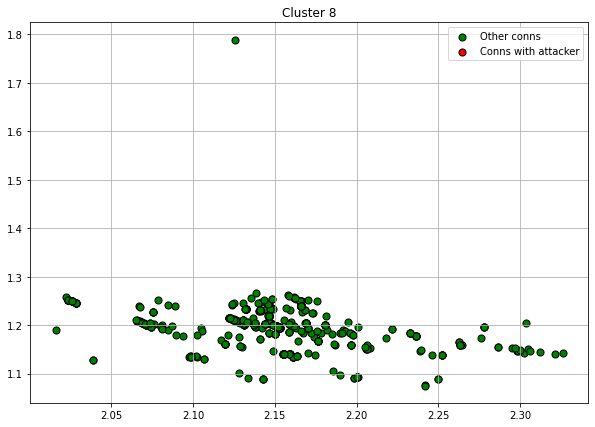

Total num of conns: 502

Attacker conns ratio:
No    502
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    501
192.168.10.3       1
Name: originated_ip, dtype: int64

61.251.165.12      49
178.255.83.1       43
23.50.75.27        40
23.60.139.27       20
72.21.91.29        15
                   ..
207.109.221.240     1
52.0.184.249        1
52.94.232.33        1
23.21.59.34         1
54.236.72.117       1
Name: responded_ip, Length: 143, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.011574Z
timestamp max = 2017-07-06T13:27:55.027857Z

Cluster 8 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
10893  Cs7MEg4fatVGzH2qS7            1.00000  192.168.10.19           0.21935   
15672  CNCDeF4s1gl6YUPQI4            1.00000  192.168.10.19           0.30919   
20346  CzoKYj34RuHEklpO26            1.00000  192.168.10.19           0.23037   
21551   CchiL82qdXqP9Z19f            1.00000  192.168.10.19           0.76739   
22471  CsIiBS1liXThnNdpDc            1.00000  192.168.10.19           0.66984   
35791   ChKX2pAoDK35Mawq9            1.00000  192.168.10.19           0.08637   
20855  CXIHOp3yswcysf2Z6a            1.00000  192.168.10.19           0.08688   
25483  CIFeRg4L9gO67aFxec            1.00000  192.168.10.19           0.23037   
23364  CclIRG3IJnjATXfxqf            1.00000  192.168.10.19           0.15017   
26561  CMdht41HSGmhcBB3mj            1.00000  192.168.10.19           0.21865   
39946   CYd1knxCrWTdHE182            1.00000  192.168.10.19           0.26326   
40519  CMMlz61uBybnL8naS6            1.00000  192.168.10.19           0.26326   
19133   CmJc11Gnx3blWTa3i            1.00000  192.168.10.19           0.45482   
25527  CuSIJq3nEQJRPwECt6            1.00000  192.168.10.19           0.26326   
20322  CDYK5C36YS1cKexMCc            1.00000  192.168.10.19           0.08706   

        responded_ip                    timestamp  connection.time  duration  \
10893    52.84.26.63  2017-07-06T12:37:42.743035Z          0.12854 115.85450   
15672    72.21.91.29  2017-07-06T13:22:23.092626Z          0.87311 121.95822   
20346  54.192.36.157  2017-07-06T12:41:42.486302Z          0.19514 115.81938   
21551  172.217.11.35  2017-07-06T12:33:48.862146Z          0.06357 115.57376   
22471  151.101.0.249  2017-07-06T12:37:41.675892Z          0.12824 115.90549   
35791    23.21.59.34   2017-07-06T12:55:41.97675Z          0.42834  61.03322   
20855    23.50.75.27  2017-07-06T12:53:06.683459Z          0.38520  83.28047   
25483   54.192.48.50  2017-07-06T12:37:41.699709Z          0.12825   5.31696   
23364   37.29.104.14  2017-07-06T12:41:36.721828Z          0.19354   6.20196   
26561   52.44.182.10  2017-07-06T12:37:42.743122Z          0.12854  60.88193   
39946  61.251.165.12   2017-07-06T12:30:02.42914Z          0.00067   0.41460   
40519  61.251.165.12  2017-07-06T12:30:03.627378Z          0.00100   0.40216   
19133   104.28.22.30  2017-07-06T12:33:48.573304Z          0.06349  46.41198   
25527  61.251.165.12  2017-07-06T12:30:01.123535Z          0.00031   0.40156   
20322   23.60.139.27  2017-07-06T12:53:14.833456Z          0.38747  89.05327   

       connection.duration protocol service conn_state  connection.orig_p  \
10893              0.08505      tcp    http         SF            0.79427   
15672              0.08953      tcp    http         SF            0.67553   
20346              0.08502      tcp    http         SF            0.83498   
21551              0.08484      tcp    http         SF            0.63448   
22471              0.08509      tcp    http         SF            0.87330   
35791              0.04481      tcp    http         SF            0.85044   
20855              0.06114      tcp    http         SF            0.88212   
25483              0.00390      tcp    none         SF            0.69138   
23364              0.00455      tcp    none         SF            0.61316   
26561              0.04469      tcp    http         SF            0.85975   
39946              0.00030      tcp    http         SF            0.53012   
40519              0.00030      tcp    http         SF            0.53041   
19133              0.03407      tcp    http         SF            0.67753   
25527              0.00029      tcp    http         SF            0.52960   
20322              0.06537      tcp    http         SF            0.68168   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
10893   52052  orig_reg_or_dyn                0.00048      298   
15672   44271  orig_reg_or_dyn                0.00560     3496   
20346   54720

Protocol:
tcp    502
Name: protocol, dtype: int64

Service:
http    381
none    121
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    502
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80    502
Name: resp_p_cat, dtype: int64




In [39]:
for i in pca_X['cluster'].unique():
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

In [40]:
df['uid'] = result['uid']
df['originated_ip_num'] = result['originated_ip_num']
df['originated_ip'] = result['originated_ip']
df['responded_ip_num'] = result['responded_ip_num']
df['responded_ip'] = result['responded_ip']
df['timestamp'] = result['timestamp']
df['duration'] = result['duration']
df['protocol'] = result['protocol']
df['service'] = result['service']
df['conn_state'] = result['conn_state']
df['o_port'] = result['o_port']
df['orig_p_cat'] = result['orig_p_cat']
df['o_bytes'] = result['o_bytes']
#df['o_ip_bytes'] = result['o_ip_bytes']
df['r_port'] = result['r_port']
df['resp_p_cat'] = result['resp_p_cat']
df['r_bytes'] = result['r_bytes']
#df['r_ip_bytes'] = result['r_ip_bytes']
df['attacker_label'] = result['attacker_label']
df['victim_label'] = result['victim_label']
df['cluster'] = y_db
df

connection.time  connection.duration  connection.orig_p  \
0              0.28205              0.00002            0.95662   
1              0.69592              0.00004            0.12611   
2              0.94669              0.00000            0.99023   
3              0.66424              0.00010            0.91786   
4              0.01940              0.00065            0.93446   
...                ...                  ...                ...   
40736          0.62229              0.00096            0.84899   
40737          0.57351              0.00004            0.92628   
40738          0.28100              0.00004            0.98163   
40739          0.06104              0.00002            0.94845   
40740          0.08624              0.00045            0.90963   

       connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                    0.00015               0.00001            0.00078   
1                    0.00012               0.00001            0.00078   
2                    0.00013               0.00001            0.00078   
3                    0.00088               0.00006            0.00684   
4                    0.00019               0.00001            0.00078   
...                      ...                   ...                ...   
40736                0.00214               0.00028            0.00030   
40737                0.00009               0.00001            0.00078   
40738                0.00025               0.00003            0.00078   
40739                0.00011               0.00001            0.00078   
40740                0.00000               0.00002            0.12605   

       connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                    0.00000               0.00001    1.00000    0.00000   
1                    0.00000               0.00001    1.00000    0.00000   
2                    0.00000               0.00001    1.00000    0.00000   
3                    0.00001               0.00005    0.00000    0.00000   
4                    0.00000               0.00001    1.00000    0.00000   
...                      ...                   ...        ...        ...   
40736                0.00001               0.00026    0.00000    1.00000   
40737                0.00000               0.00001    1.00000    0.00000   
40738                0.00000               0.00002    1.00000    0.00000   
40739                0.00000               0.00001    1.00000    0.00000   
40740                0.00000               0.00001    0.00000    0.00000   

       http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0         0.00000    0.00000      0.00000                           1   
1         0.00000    0.00000      0.00000                           1   
2         0.00000    0.00000      0.00000                           1   
3         0.00000    1.00000      0.02970                           1   
4         0.00000    0.00000      0.00000                           1   
...           ...        ...          ...                         ...   
40736     0.00000    0.00000      0.00000                           1   
40737     0.00000    0.00000      0.00000                           1   
40738     0.00000    0.00000      0.00000                           1   
40739     0.00000    0.00000      0.00000                           1   
40740     0.00000    0.00000      0.00000                           1   

       orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                               0                    0                   0   
1                               0                    0                   0   
2                               0                    0                   0   
3                               0                    0                   0   
4                               0                    0                   0   
...                           ...                  ...                 ...   
4

## Evaluation

Metric that quantifies level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [42]:
from sklearn import metrics

labels = db_fitted.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_X, labels))

Estimated number of clusters: 9
Estimated number of noise points: 1731
Silhouette Coefficient: 0.586


## Interpretation

Parallel coordinates plots.

In [43]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

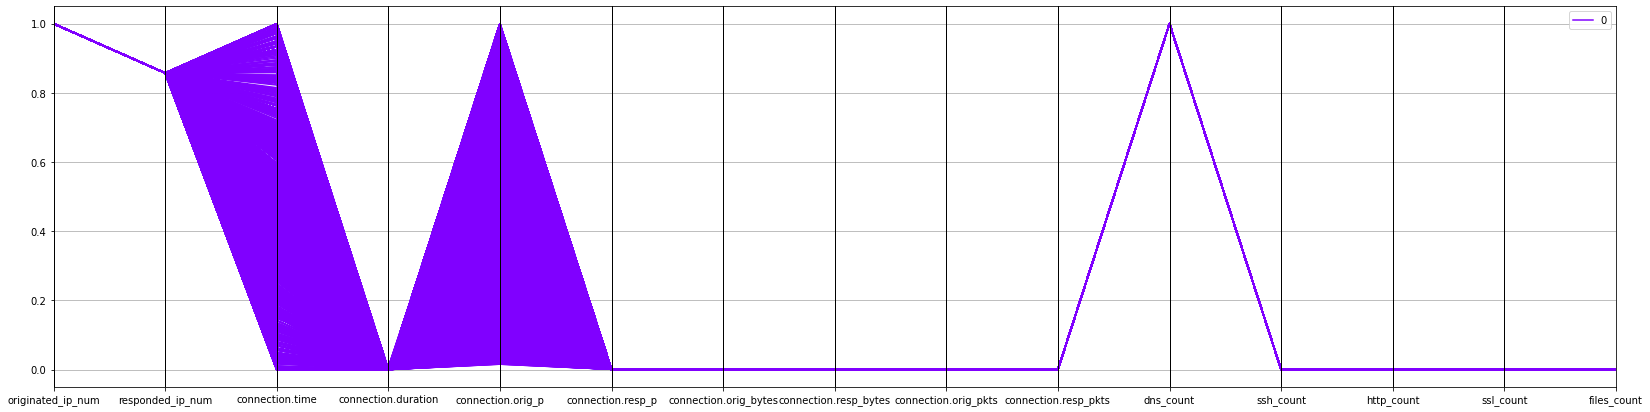

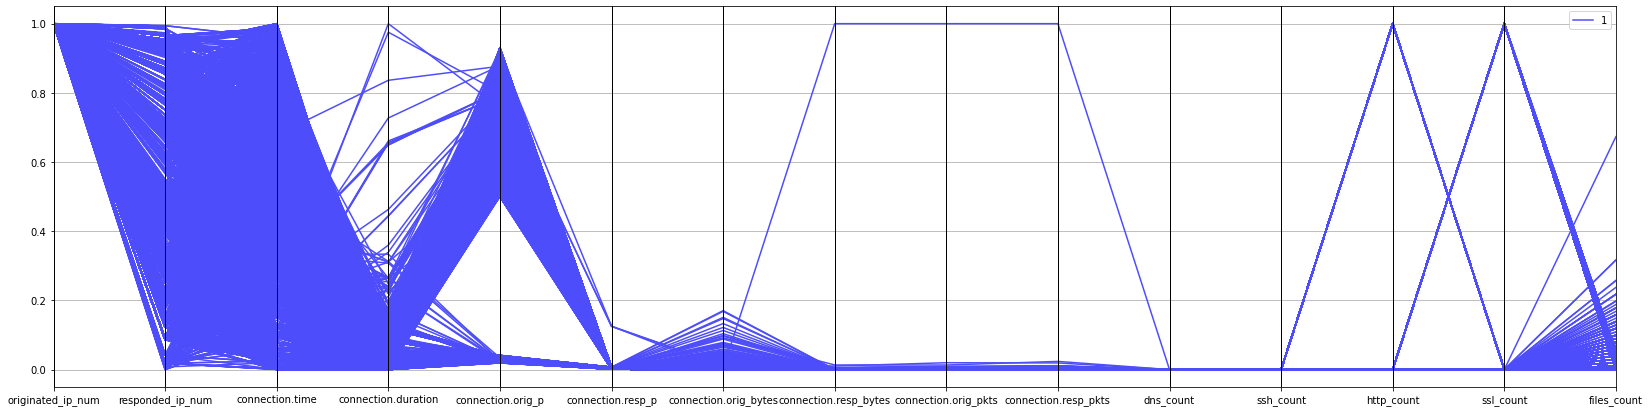

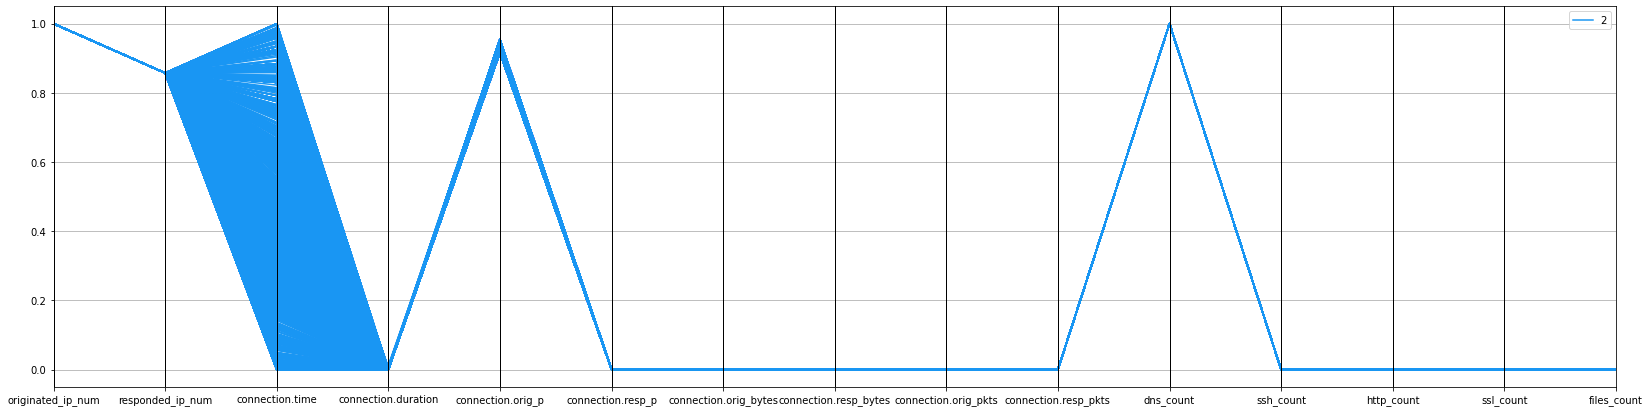

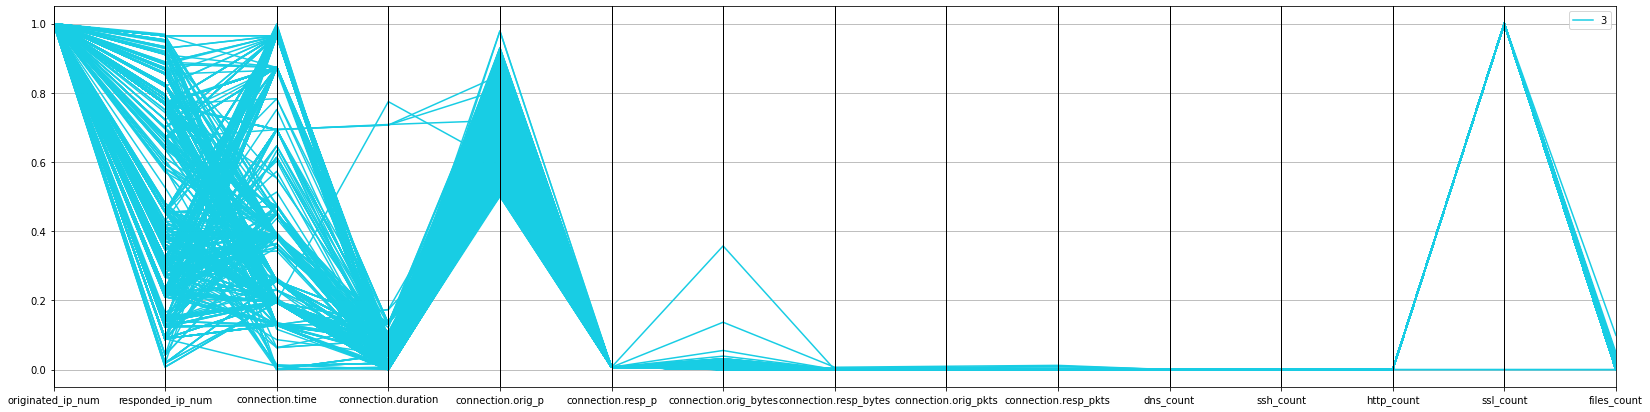

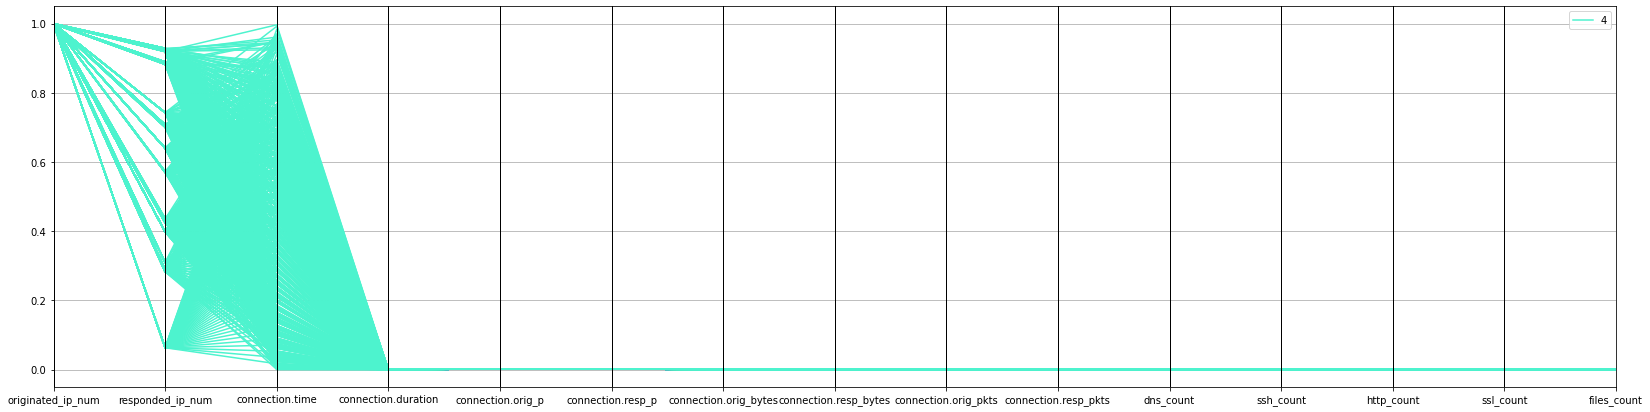

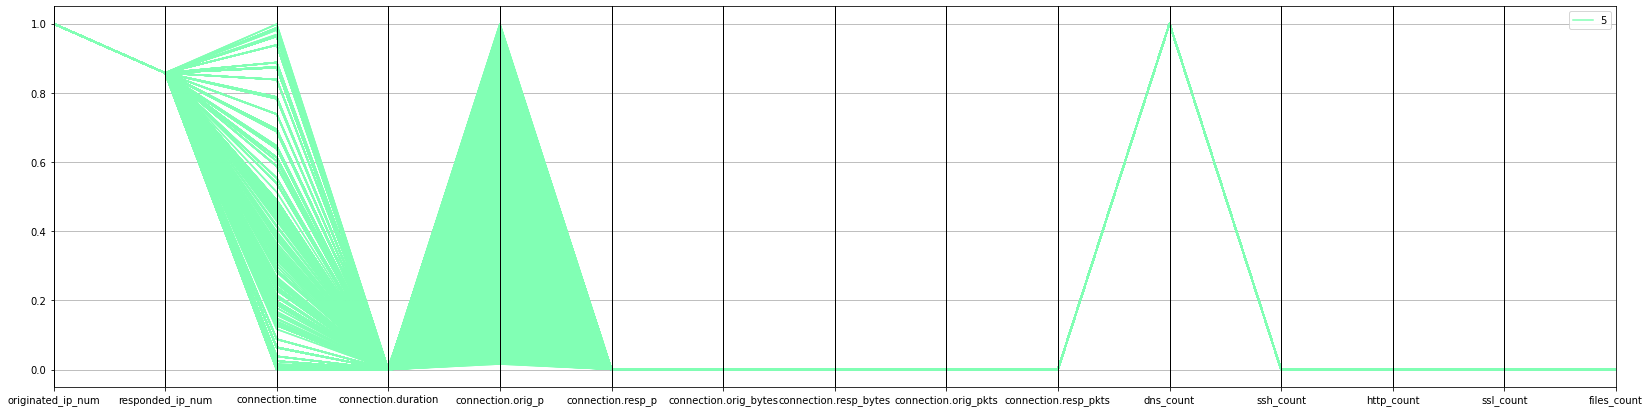

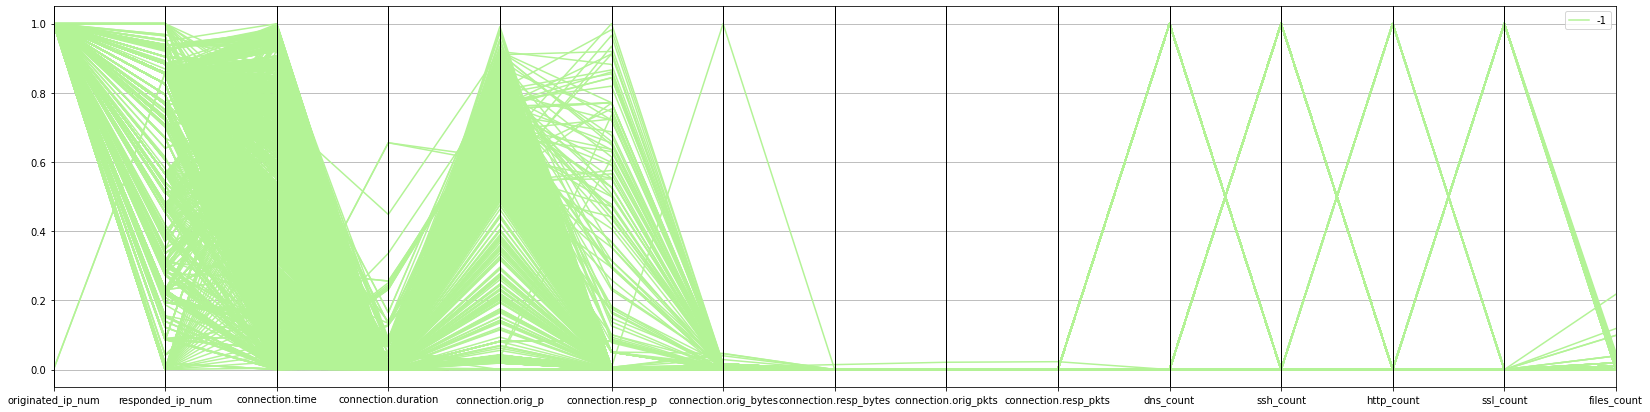

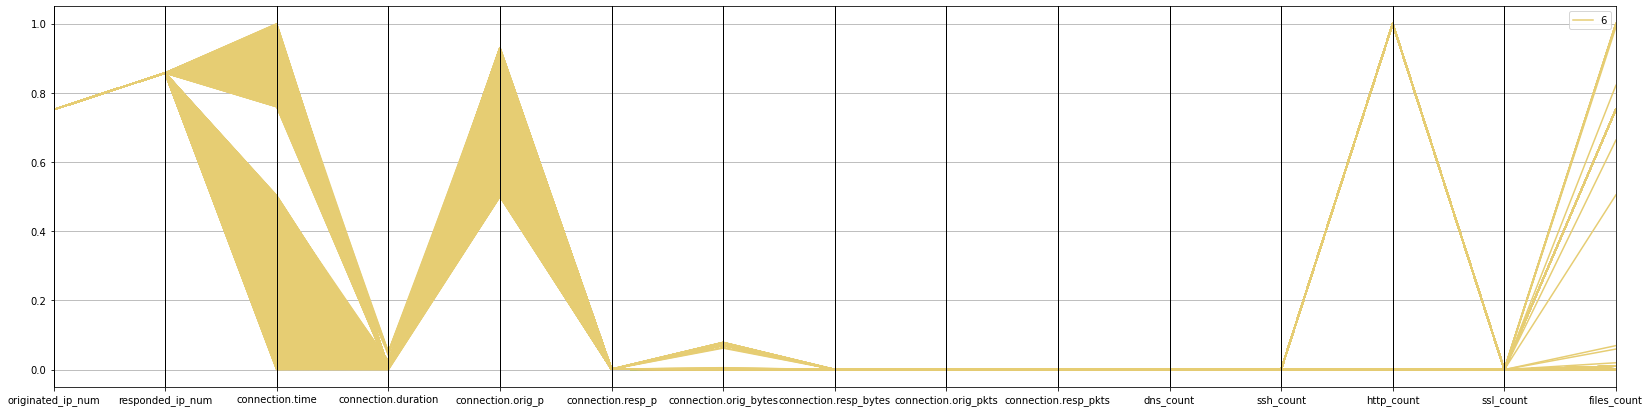

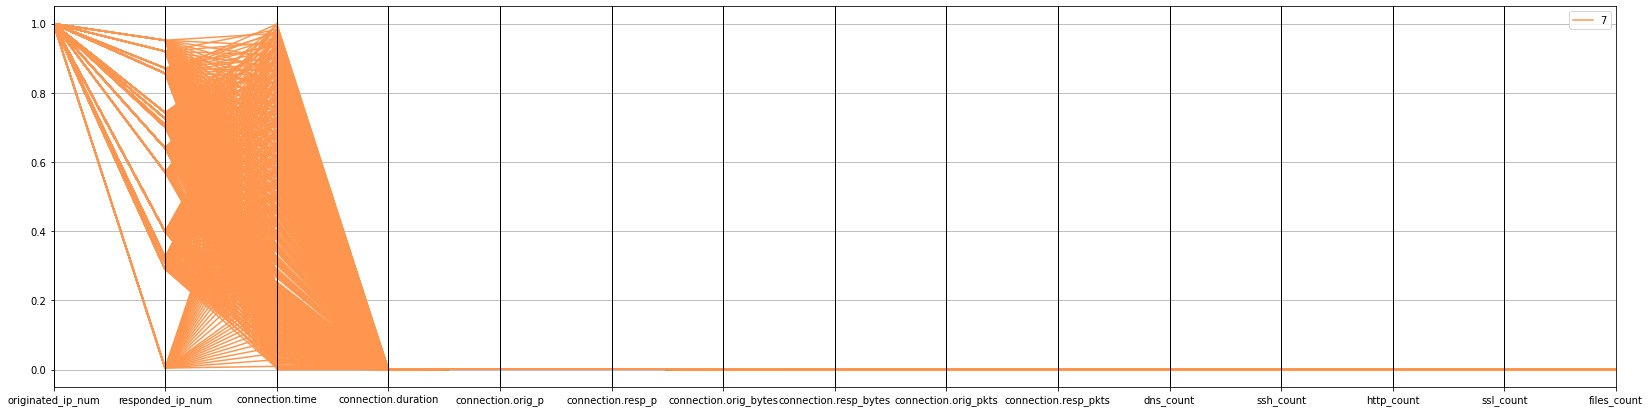

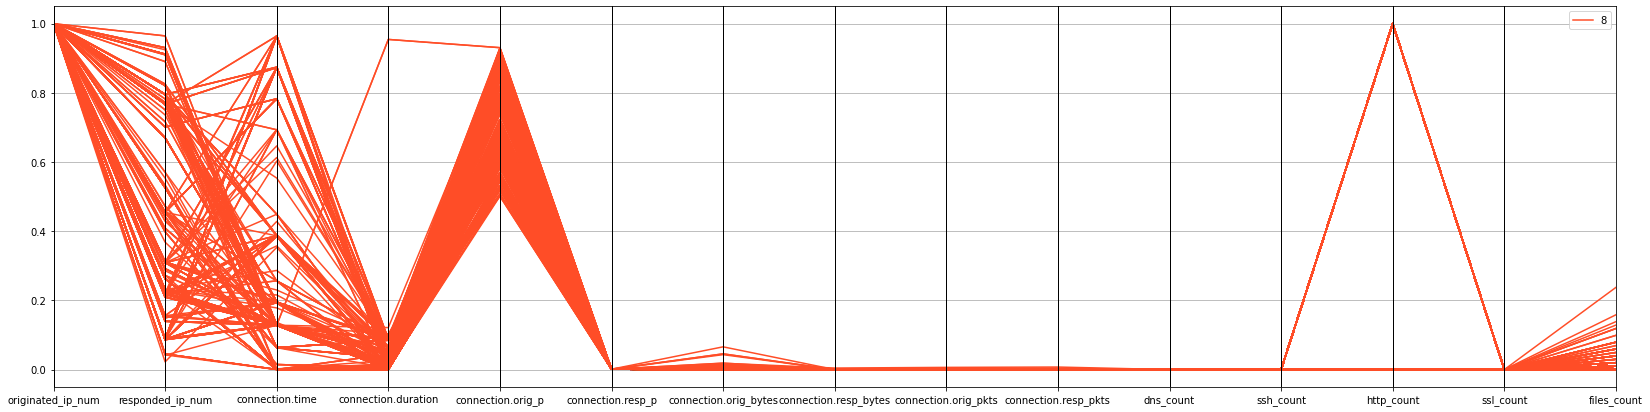

In [44]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

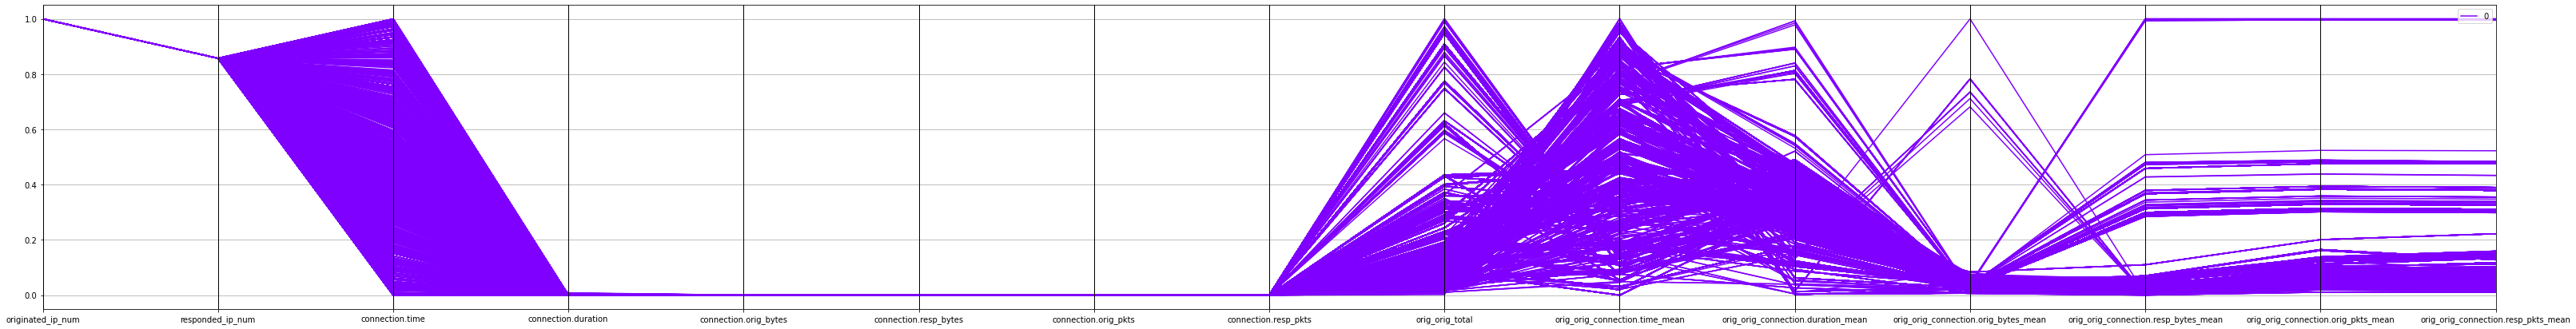

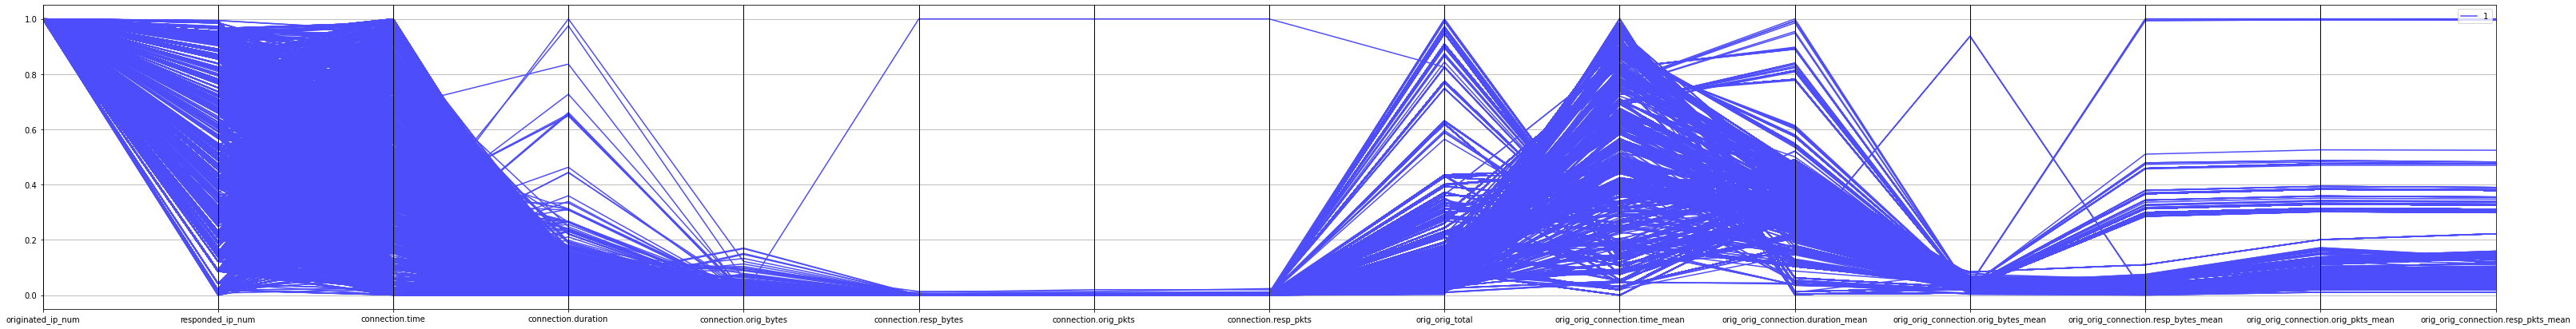

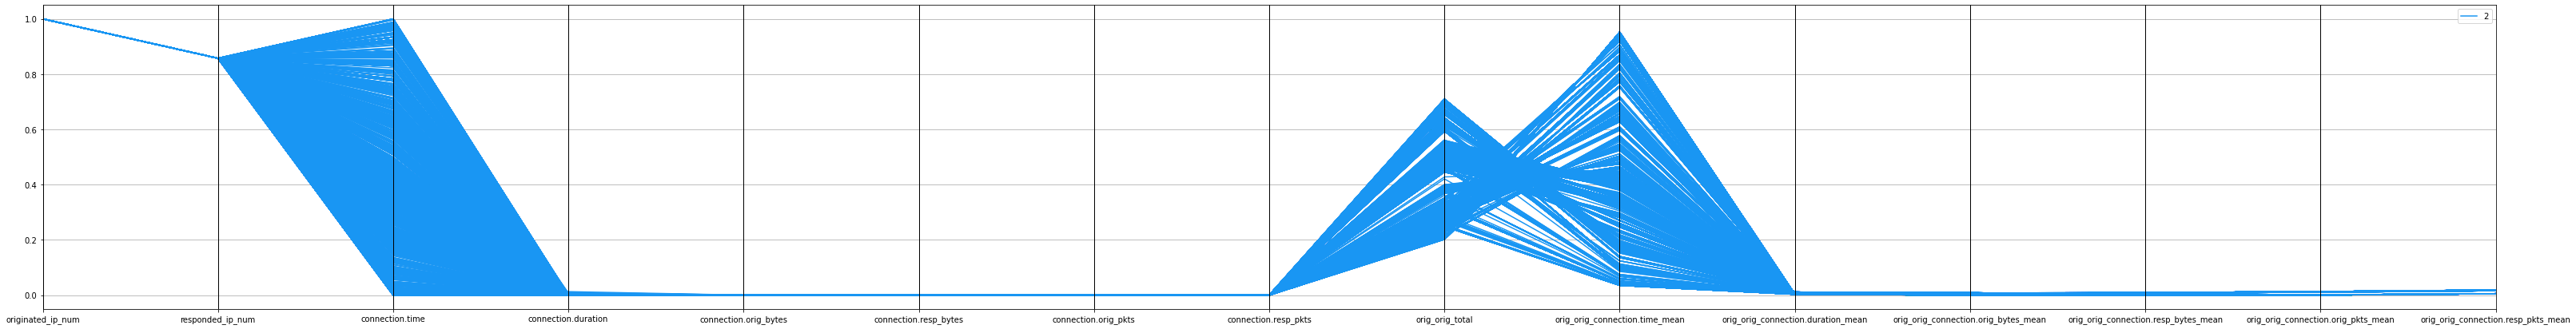

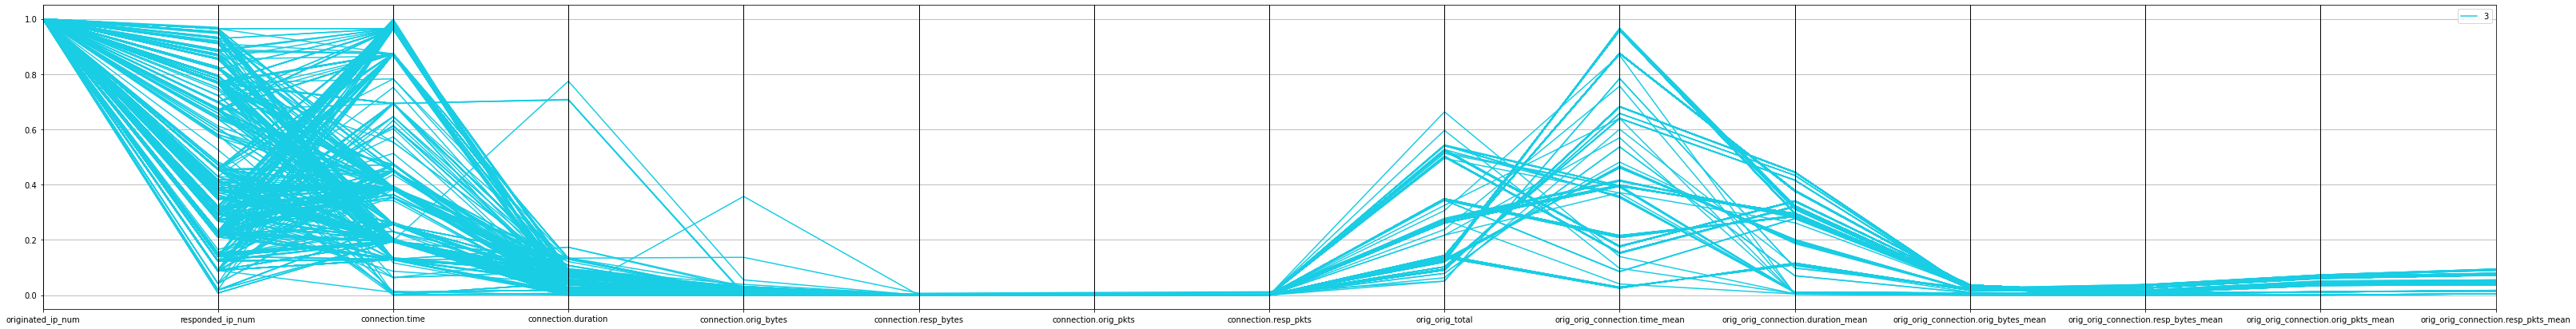

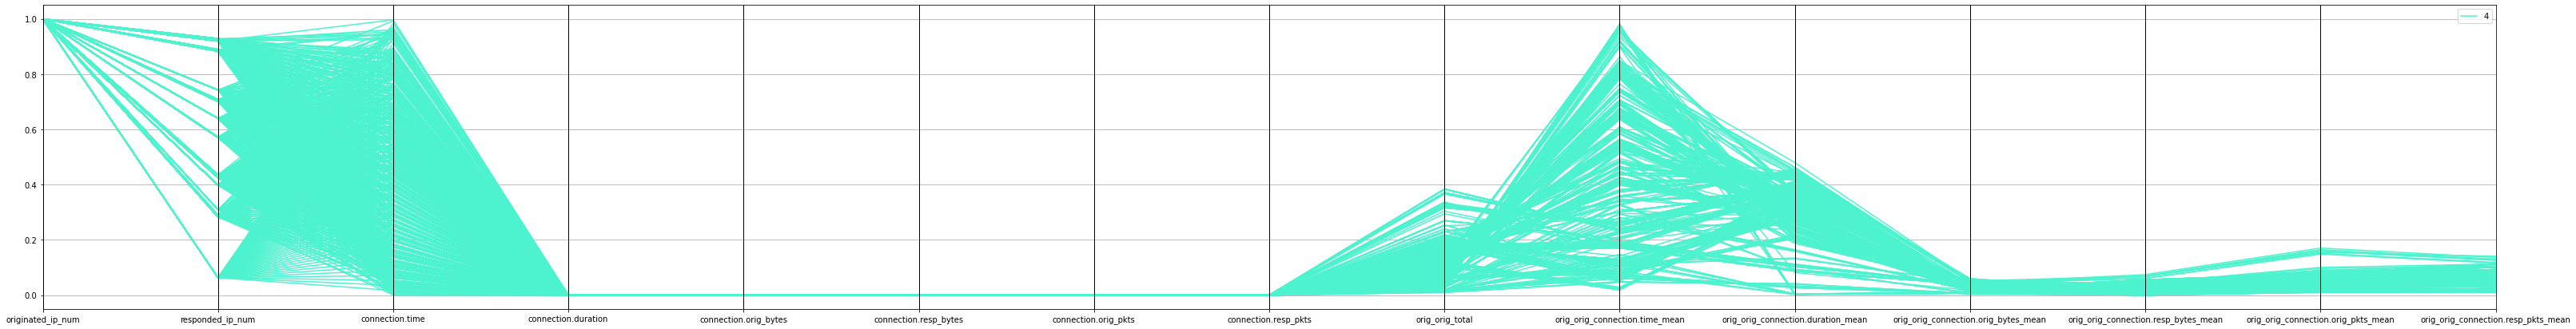

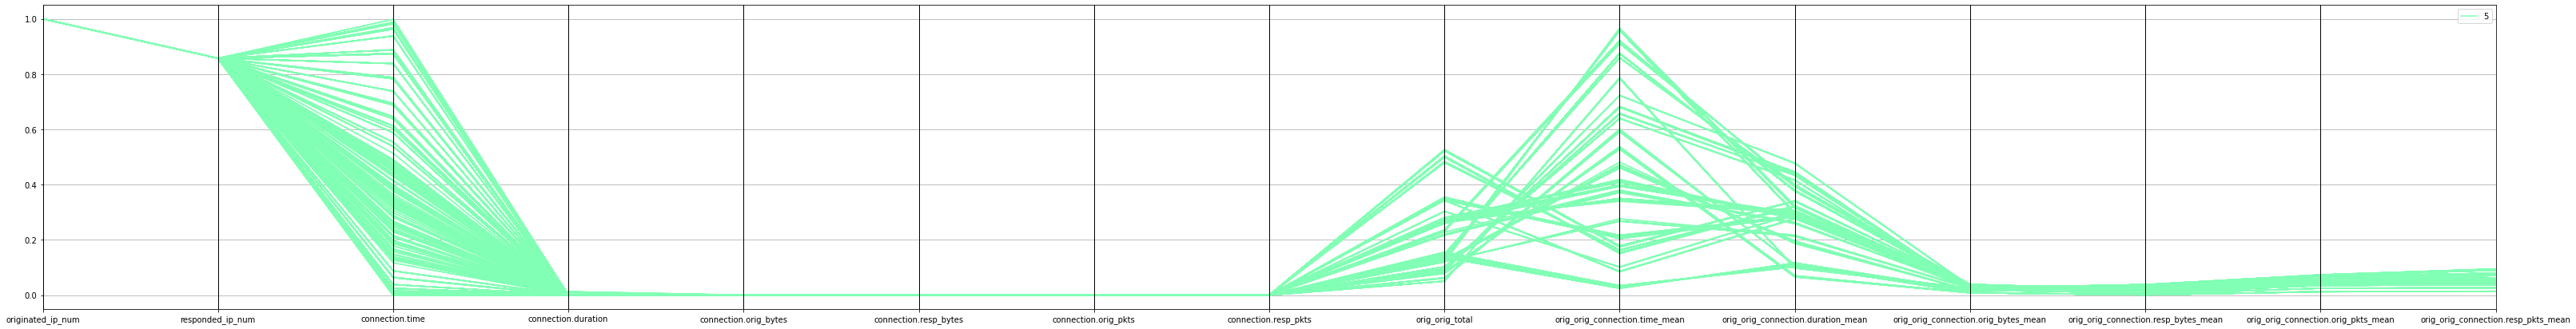

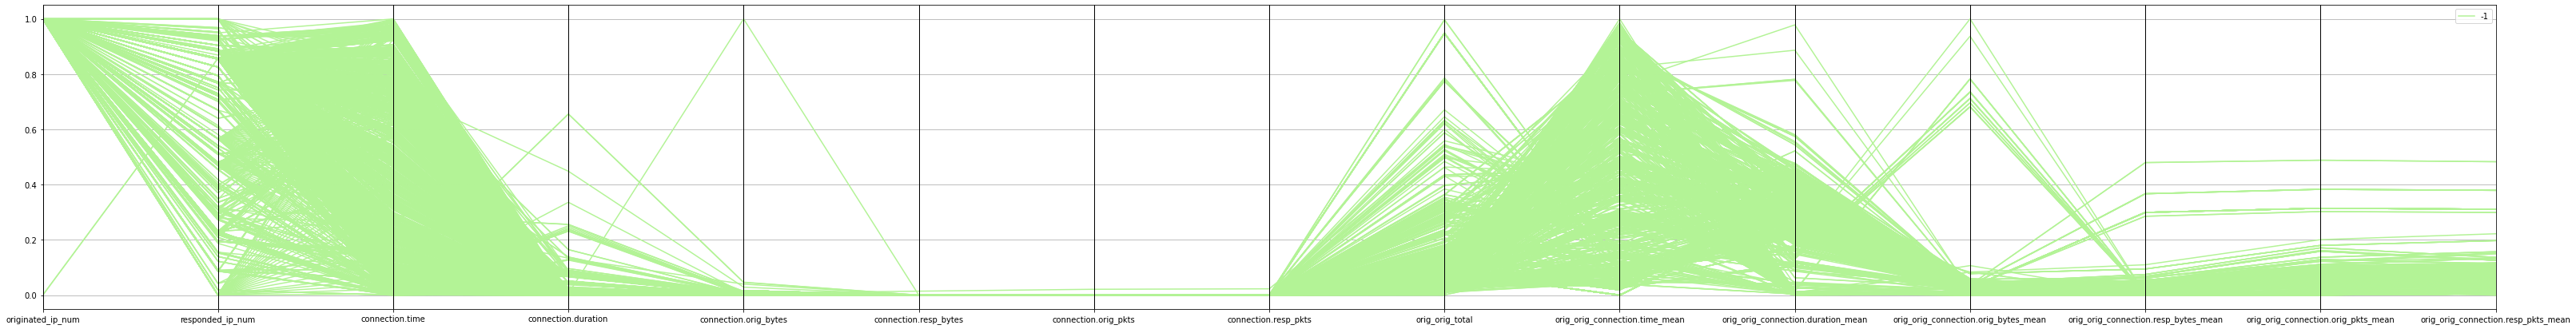

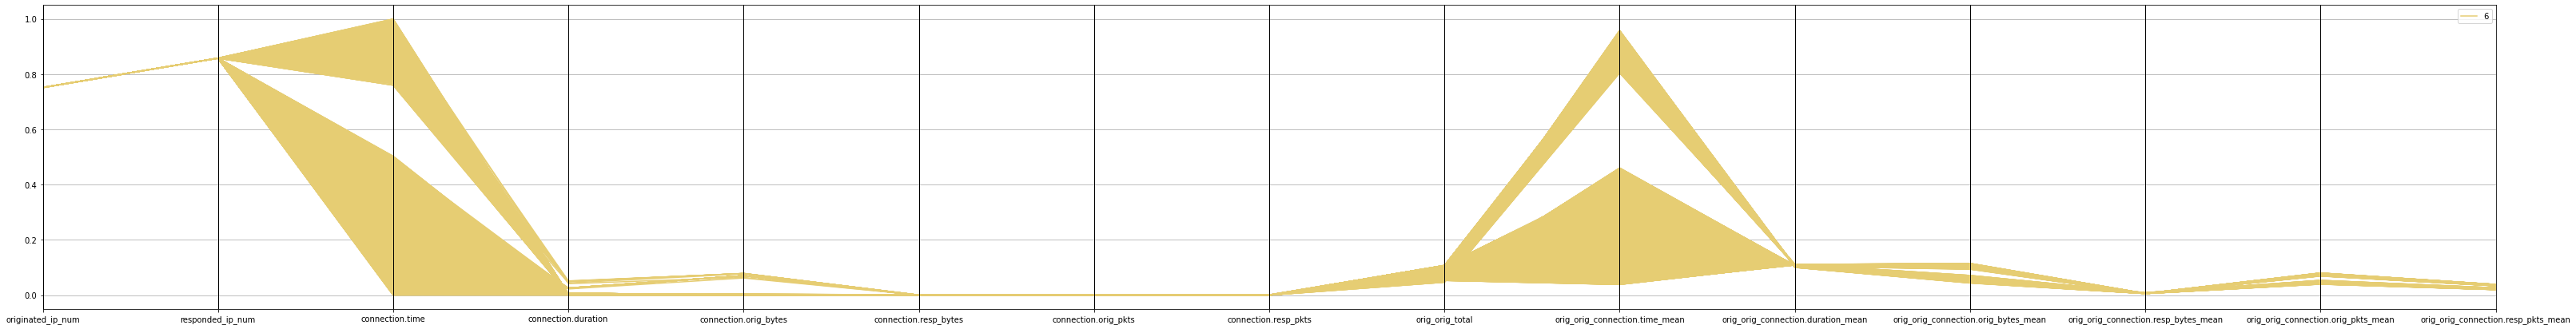

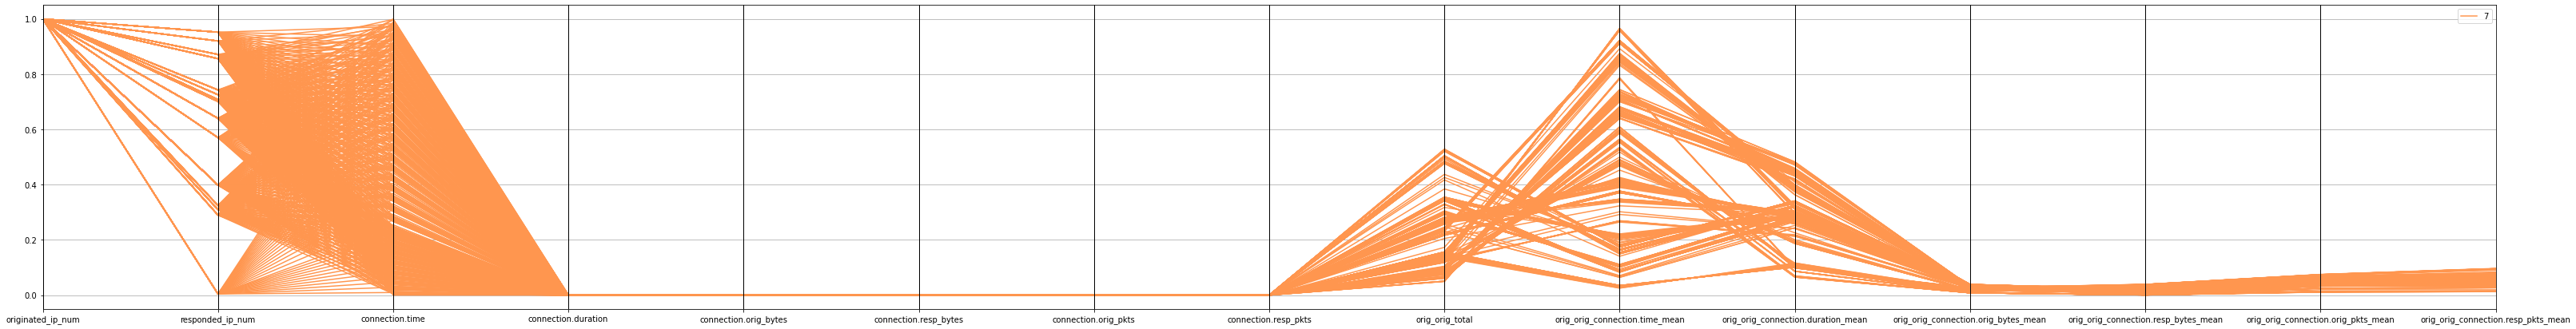

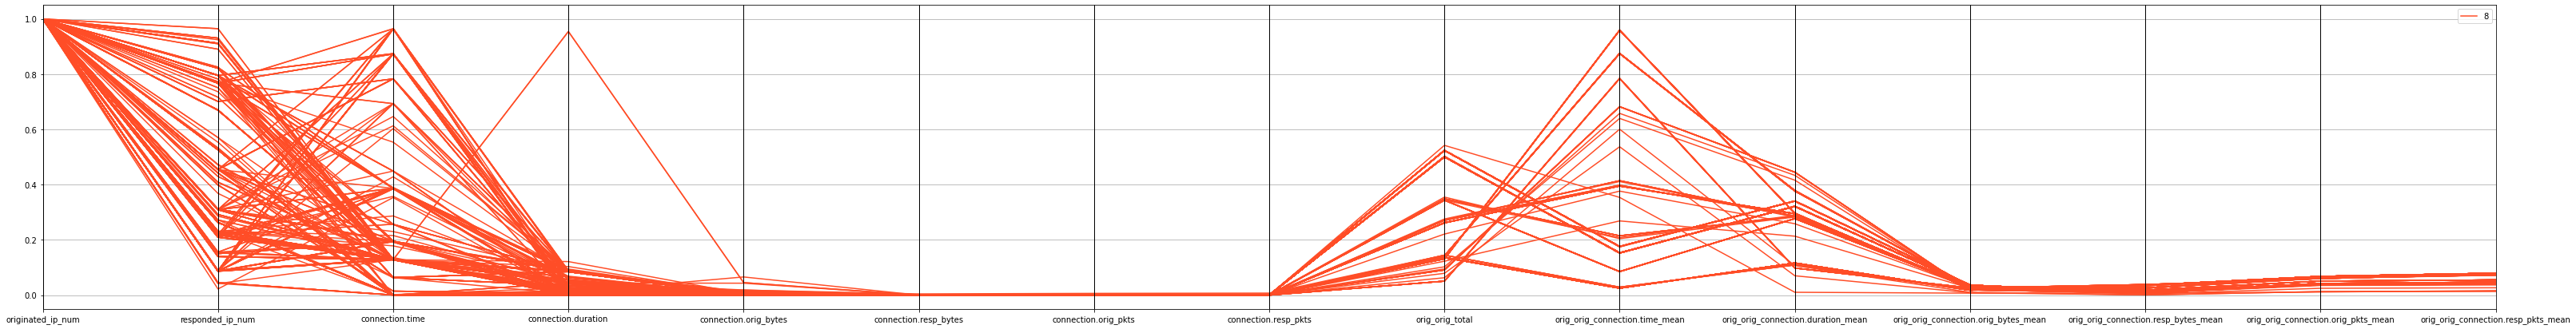

In [45]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()